# Cleaning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"D:\My_Documents\master_NYU\24spring\MLC\final\all_data.csv")
data

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1          AEA040     A332   LEMD        LEMD  2018-12-31 01:07:21+00:00   
2          CXA825     B788   YSSY        LFPG  2018-12-31 01:18:29+00:00   
3          CLU211     B744   UUEE        EDDF  2018-12-31 01:49:28+00:00   
4          ETH704     B788   KLDJ        LFPG  2018-12-31 03:31:48+00:00   
...           ...      ...    ...         ...                        ...   
42424537   N749SF     B407   K1H0        MO35  2022-12-31 23:38:12+00:00   
42424538   SDA289     C208   NZWN        NZWB  2022-12-31 23:42:19+00:00   
42424539   N988NW     FA7X   KPBI        KFLL  2022-12-31 23:42:27+00:00   
42424540   N835CS     EC35   MS90        K08M  2022-12-31 23:44:12+00:00   
42424541     39BP      R22   WN80        8OR6  2022-12-31 23:48:19+00:00   

                           lastseen                        day  
0         2019-01-01 04:09:29+00:00  2019-01-01 00:00:00+00:00  
1         2019-01-01 03:32:59+00:00  2019-01-01 00:00:00+00:00  
2         2019-01-01 04:32:28+00:00  2019-01-01 00:00:00+00:00  
3         2019-01-01 04:11:38+00:00  2019-01-01 00:00:00+00:00  
4         2019-01-01 04:30:10+00:00  2019-01-01 00:00:00+00:00  
...                             ...                        ...  
42424537  2022-12-31 23:57:10+00:00  2022-12-31 00:00:00+00:00  
42424538  2022-12-31 23:57:29+00:00  2022-12-31 00:00:00+00:00  
42424539  2022-12-31 23:57:27+00:00  2022-12-31 00:00:00+00:00  
42424540  2022-12-31 23:58:55+00:00  2022-12-31 00:00:00+00:00  
42424541  2022-12-31 23:59:29+00:00  2022-12-31 00:00:00+00:00  

[42424542 rows x 7 columns]

In [4]:
icao=pd.read_csv(r"D:\My_Documents\master_NYU\24spring\MLC\final\iata-icao.csv")
icao

country_code         region_name iata  icao  \
0              AE            Abu Zaby  AAN  OMAL   
1              AE            Abu Zaby  AUH  OMAA   
2              AE            Abu Zaby  AYM   NaN   
3              AE            Abu Zaby  AZI  OMAD   
4              AE            Abu Zaby  DHF  OMAM   
...           ...                 ...  ...   ...   
8932           ZW            Masvingo  MVZ  FVMV   
8933           ZW  Matabeleland North  HWN  FVWN   
8934           ZW  Matabeleland North  VFA  FVFA   
8935           ZW  Matabeleland North  WKI  FVWT   
8936           ZW            Midlands  GWE  FVTL   

                              airport  latitude  longitude  
0        Al Ain International Airport   24.2617    55.6092  
1     Abu Dhabi International Airport   24.4330    54.6511  
2            Yas Island Seaplane Base   24.4670    54.6103  
3         Al Bateen Executive Airport   24.4283    54.4581  
4                  Al Dhafra Air Base   24.2482    54.5477  
...                               ...       ...        ...  
8932                 Masvingo Airport  -20.0553    30.8591  
8933     Hwange National Park Airport  -18.6299    27.0210  
8934           Victoria Falls Airport  -18.0959    25.8390  
8935              Hwange Town Airport  -18.3630    26.5198  
8936               Thornhill Air Base  -19.4364    29.8619  

[8937 rows x 7 columns]

In [5]:
uniqO = data['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

0
0      YSSY
1      LEMD
2      UUEE
3      KLDJ
4      WIII
...     ...
15273  RJSF
15274  LERI
15275  SC19
15276  45WY
15277  7GA3

[15278 rows x 1 columns]

In [6]:
duniqO = icao['icao'].unique()
duniqO_df = pd.DataFrame(duniqO)
duniqO_df

0
0     OMAL
1     OMAA
2      NaN
3     OMAD
4     OMAM
...    ...
7787  FVMV
7788  FVWN
7789  FVFA
7790  FVWT
7791  FVTL

[7792 rows x 1 columns]

In [7]:
# Filter the DataFrame
filter_major_planetype = data[data['typecode'].str.startswith(('A3', 'B7', 'E1','DH','CRJ'))]

# Print the filtered DataFrame
filter_major_planetype

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1          AEA040     A332   LEMD        LEMD  2018-12-31 01:07:21+00:00   
2          CXA825     B788   YSSY        LFPG  2018-12-31 01:18:29+00:00   
3          CLU211     B744   UUEE        EDDF  2018-12-31 01:49:28+00:00   
4          ETH704     B788   KLDJ        LFPG  2018-12-31 03:31:48+00:00   
...           ...      ...    ...         ...                        ...   
42424528  ENY3800     E145   KORD        KCMI  2022-12-31 23:30:50+00:00   
42424530    CFHAJ     DH3T   CYVR        CYVR  2022-12-31 23:32:33+00:00   
42424531   VTE565     E145   KMQY        KBNA  2022-12-31 23:34:30+00:00   
42424534    CFPCG     DHC2   2WA3        CYVR  2022-12-31 23:36:52+00:00   
42424535  ENY3714     E145   KORD        9IL7  2022-12-31 23:37:34+00:00   

                           lastseen                        day  
0         2019-01-01 04:09:29+00:00  2019-01-01 00:00:00+00:00  
1         2019-01-01 03:32:59+00:00  2019-01-01 00:00:00+00:00  
2         2019-01-01 04:32:28+00:00  2019-01-01 00:00:00+00:00  
3         2019-01-01 04:11:38+00:00  2019-01-01 00:00:00+00:00  
4         2019-01-01 04:30:10+00:00  2019-01-01 00:00:00+00:00  
...                             ...                        ...  
42424528  2022-12-31 23:56:58+00:00  2022-12-31 00:00:00+00:00  
42424530  2022-12-31 23:52:52+00:00  2022-12-31 00:00:00+00:00  
42424531  2022-12-31 23:47:15+00:00  2022-12-31 00:00:00+00:00  
42424534  2022-12-31 23:50:34+00:00  2022-12-31 00:00:00+00:00  
42424535  2022-12-31 23:59:42+00:00  2022-12-31 00:00:00+00:00  

[28918130 rows x 7 columns]

In [8]:
# Filter the DataFrame to include only rows where the callsign starts with three letters
filtered_df = filter_major_planetype[filter_major_planetype['callsign'].str.match(r'^[A-Z]{3}')]
# This regex: ^[A-Z]{3} ensures the string starts (^) with exactly three capital letters ([A-Z]{3})
filtered_com_major = filtered_df[~filtered_df['callsign'].str.match(r'^[A-Z]+$')]
# This regex: ^[A-Z]+$ matches strings that start and end with one or more capital letters


filtered_com_major

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1          AEA040     A332   LEMD        LEMD  2018-12-31 01:07:21+00:00   
2          CXA825     B788   YSSY        LFPG  2018-12-31 01:18:29+00:00   
3          CLU211     B744   UUEE        EDDF  2018-12-31 01:49:28+00:00   
4          ETH704     B788   KLDJ        LFPG  2018-12-31 03:31:48+00:00   
...           ...      ...    ...         ...                        ...   
42424525  PDT6131     E145   KMDT        KPHL  2022-12-31 23:29:15+00:00   
42424527   JZA319     DH8D   CYQQ        CYVR  2022-12-31 23:30:43+00:00   
42424528  ENY3800     E145   KORD        KCMI  2022-12-31 23:30:50+00:00   
42424531   VTE565     E145   KMQY        KBNA  2022-12-31 23:34:30+00:00   
42424535  ENY3714     E145   KORD        9IL7  2022-12-31 23:37:34+00:00   

                           lastseen                        day  
0         2019-01-01 04:09:29+00:00  2019-01-01 00:00:00+00:00  
1         2019-01-01 03:32:59+00:00  2019-01-01 00:00:00+00:00  
2         2019-01-01 04:32:28+00:00  2019-01-01 00:00:00+00:00  
3         2019-01-01 04:11:38+00:00  2019-01-01 00:00:00+00:00  
4         2019-01-01 04:30:10+00:00  2019-01-01 00:00:00+00:00  
...                             ...                        ...  
42424525  2022-12-31 23:50:46+00:00  2022-12-31 00:00:00+00:00  
42424527  2022-12-31 23:51:42+00:00  2022-12-31 00:00:00+00:00  
42424528  2022-12-31 23:56:58+00:00  2022-12-31 00:00:00+00:00  
42424531  2022-12-31 23:47:15+00:00  2022-12-31 00:00:00+00:00  
42424535  2022-12-31 23:59:42+00:00  2022-12-31 00:00:00+00:00  

[28659202 rows x 7 columns]

In [9]:
unique_typecodes = filtered_com_major['typecode'].unique()

# Create a dictionary with all values under one key
PlaneTypes = {'Typecode': list(unique_typecodes)}

# Convert the dictionary to a DataFrame
PlaneTypes_df = pd.DataFrame(PlaneTypes)

# Display the DataFrame
PlaneTypes_df = PlaneTypes_df.sort_values(by='Typecode')
PlaneTypes_df


Typecode
35     A306
59     A30B
15     A310
42     A318
20     A319
..      ...
29     E145
30     E170
72     E175
27     E190
46     E195

[100 rows x 1 columns]

In [10]:
uniqO = filtered_com_major['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

0
0     YSSY
1     LEMD
2     UUEE
3     KLDJ
4     WIII
...    ...
5753  EG03
5754  KSTK
5755  LGLR
5756  KSFQ
5757  VA04

[5758 rows x 1 columns]

In [11]:
uniqD = filtered_com_major['destination'].unique()
uniqD_df = pd.DataFrame(uniqD)
uniqD_df

0
0      EDDF
1      LEMD
2      LFPG
3      RPLL
4      KLAX
...     ...
10755  4WI9
10756  LSZC
10757  KAKO
10758  ORUQ
10759  23XS

[10760 rows x 1 columns]

In [12]:
filtered_com_major['day'] = pd.to_datetime(filtered_com_major['day'])
filtered_com_major

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1          AEA040     A332   LEMD        LEMD  2018-12-31 01:07:21+00:00   
2          CXA825     B788   YSSY        LFPG  2018-12-31 01:18:29+00:00   
3          CLU211     B744   UUEE        EDDF  2018-12-31 01:49:28+00:00   
4          ETH704     B788   KLDJ        LFPG  2018-12-31 03:31:48+00:00   
...           ...      ...    ...         ...                        ...   
42424525  PDT6131     E145   KMDT        KPHL  2022-12-31 23:29:15+00:00   
42424527   JZA319     DH8D   CYQQ        CYVR  2022-12-31 23:30:43+00:00   
42424528  ENY3800     E145   KORD        KCMI  2022-12-31 23:30:50+00:00   
42424531   VTE565     E145   KMQY        KBNA  2022-12-31 23:34:30+00:00   
42424535  ENY3714     E145   KORD        9IL7  2022-12-31 23:37:34+00:00   

                           lastseen                       day  
0         2019-01-01 04:09:29+00:00 2019-01-01 00:00:00+00:00  
1         2019-01-01 03:32:59+00:00 2019-01-01 00:00:00+00:00  
2         2019-01-01 04:32:28+00:00 2019-01-01 00:00:00+00:00  
3         2019-01-01 04:11:38+00:00 2019-01-01 00:00:00+00:00  
4         2019-01-01 04:30:10+00:00 2019-01-01 00:00:00+00:00  
...                             ...                       ...  
42424525  2022-12-31 23:50:46+00:00 2022-12-31 00:00:00+00:00  
42424527  2022-12-31 23:51:42+00:00 2022-12-31 00:00:00+00:00  
42424528  2022-12-31 23:56:58+00:00 2022-12-31 00:00:00+00:00  
42424531  2022-12-31 23:47:15+00:00 2022-12-31 00:00:00+00:00  
42424535  2022-12-31 23:59:42+00:00 2022-12-31 00:00:00+00:00  

[28659202 rows x 7 columns]

In [13]:
filtered_com_major.dtypes

callsign                    object
typecode                    object
origin                      object
destination                 object
firstseen                   object
lastseen                    object
day            datetime64[ns, UTC]
dtype: object

In [14]:
count_before = filtered_com_major.groupby('day').count()
count_before

callsign  typecode  origin  destination  firstseen  \
day                                                                             
2019-01-01 00:00:00+00:00     18127     18127   18127        18127      18127   
2019-01-02 00:00:00+00:00     21424     21424   21424        21424      21424   
2019-01-03 00:00:00+00:00     22032     22032   22032        22032      22032   
2019-01-04 00:00:00+00:00     22385     22385   22385        22385      22385   
2019-01-05 00:00:00+00:00     19436     19436   19436        19436      19436   
...                             ...       ...     ...          ...        ...   
2022-12-27 00:00:00+00:00     15730     15730   15730        15730      15730   
2022-12-28 00:00:00+00:00     20183     20183   20183        20183      20183   
2022-12-29 00:00:00+00:00     21031     21031   21031        21031      21031   
2022-12-30 00:00:00+00:00     21897     21897   21897        21897      21897   
2022-12-31 00:00:00+00:00     19545     19545   19545        19545      19545   

                           lastseen  
day                                  
2019-01-01 00:00:00+00:00     18127  
2019-01-02 00:00:00+00:00     21424  
2019-01-03 00:00:00+00:00     22032  
2019-01-04 00:00:00+00:00     22385  
2019-01-05 00:00:00+00:00     19436  
...                             ...  
2022-12-27 00:00:00+00:00     15730  
2022-12-28 00:00:00+00:00     20183  
2022-12-29 00:00:00+00:00     21031  
2022-12-30 00:00:00+00:00     21897  
2022-12-31 00:00:00+00:00     19545  

[1458 rows x 6 columns]

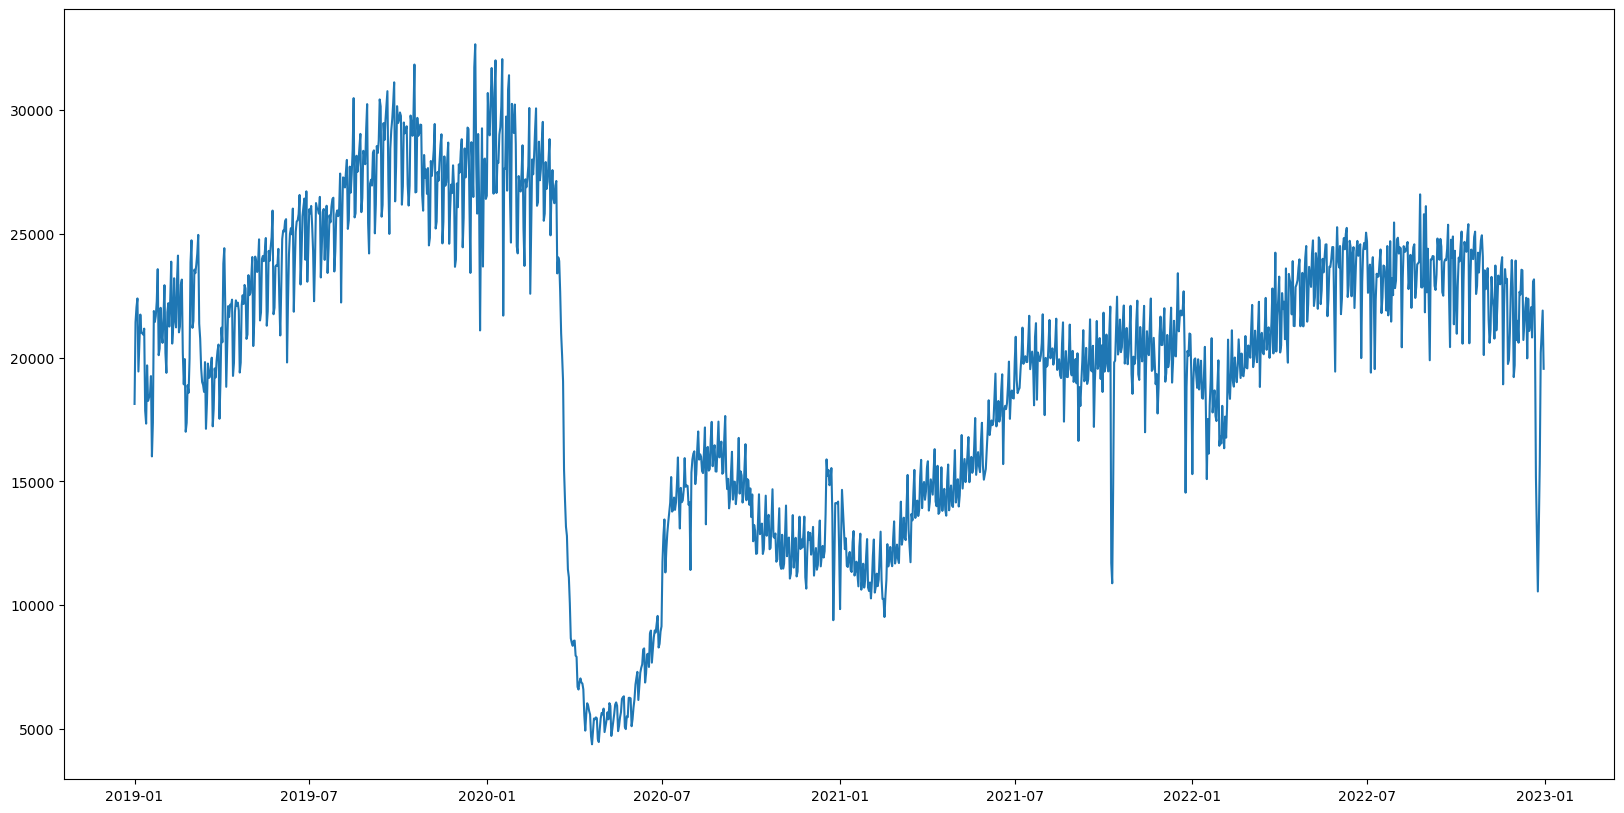

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.show()

In [16]:
icaoO = pd.DataFrame()
icaoO['origin'] = icao['icao']
icaoO['Olatitude'] = icao['latitude']
icaoO['Olongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major, icaoO, on='origin', how='inner')

In [17]:
filtered_com_major_final

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1          CXA825     B788   YSSY        LFPG  2018-12-31 01:18:29+00:00   
2           HVN55     B789   YSSY        EGLL  2018-12-31 04:37:28+00:00   
3           BAW16     B77W   YSSY        EGLL  2018-12-31 05:50:41+00:00   
4            QFA1     A388   YSSY        EGLL  2018-12-31 06:28:52+00:00   
...           ...      ...    ...         ...                        ...   
27108567  SKW5843     CRJ2   KCPR        KDEN  2022-12-31 15:03:40+00:00   
27108568  SKW4658     CRJ2   KCPR        KDEN  2022-12-31 20:47:17+00:00   
27108569  SKW5809     CRJ2   KCPR        KDEN  2022-12-31 22:31:01+00:00   
27108570    CVU90     DHC6   KSTK        KDEN  2022-12-27 17:48:08+00:00   
27108571   SAM907     B737   LGLR        EINN  2022-12-28 10:36:15+00:00   

                           lastseen                       day  Olatitude  \
0         2019-01-01 04:09:29+00:00 2019-01-01 00:00:00+00:00   -33.9461   
1         2019-01-01 04:32:28+00:00 2019-01-01 00:00:00+00:00   -33.9461   
2         2019-01-01 06:44:42+00:00 2019-01-01 00:00:00+00:00   -33.9461   
3         2019-01-01 05:18:06+00:00 2019-01-01 00:00:00+00:00   -33.9461   
4         2019-01-01 06:03:57+00:00 2019-01-01 00:00:00+00:00   -33.9461   
...                             ...                       ...        ...   
27108567  2022-12-31 15:40:05+00:00 2022-12-31 00:00:00+00:00    42.9080   
27108568  2022-12-31 21:24:52+00:00 2022-12-31 00:00:00+00:00    42.9080   
27108569  2022-12-31 23:08:36+00:00 2022-12-31 00:00:00+00:00    42.9080   
27108570  2022-12-27 18:22:06+00:00 2022-12-27 00:00:00+00:00    40.6153   
27108571  2022-12-28 14:46:50+00:00 2022-12-28 00:00:00+00:00    39.6503   

          Olongitude  
0           151.1770  
1           151.1770  
2           151.1770  
3           151.1770  
4           151.1770  
...              ...  
27108567   -106.4640  
27108568   -106.4640  
27108569   -106.4640  
27108570   -103.2650  
27108571     22.4655  

[27108572 rows x 9 columns]

In [18]:
icaoD = pd.DataFrame()
icaoD['destination'] = icao['icao']
icaoD['Dlatitude'] = icao['latitude']
icaoD['Dlongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major_final, icaoD, on='destination', how='inner')

In [19]:
filtered_com_major_final

callsign typecode origin destination                  firstseen  \
0          CES219     A332   YSSY        EDDF  2018-12-31 01:05:29+00:00   
1           SIA26     A388   YSSY        EDDF  2019-01-02 05:19:34+00:00   
2           SIA26     A388   YSSY        EDDF  2019-01-03 05:29:15+00:00   
3           SIA26     A388   YSSY        EDDF  2019-01-04 05:23:35+00:00   
4           HVN37     B789   YSSY        EDDF  2019-01-05 04:38:41+00:00   
...           ...      ...    ...         ...                        ...   
24088250  GOJUMP4     DHC6   KOKB        KOKB  2022-07-31 21:34:23+00:00   
24088251  GOJUMP4     DHC6   KOKB        KOKB  2022-08-01 20:32:15+00:00   
24088252  SKW405L     CRJ2   KMEI        KLUL  2022-10-03 21:33:17+00:00   
24088253  SKW405L     CRJ2   KMEI        KLUL  2022-10-19 21:26:08+00:00   
24088254  GOW3147     A320   VEBD        VEGT  2022-10-16 03:12:16+00:00   

                           lastseen                       day  Olatitude  \
0         2019-01-01 04:09:29+00:00 2019-01-01 00:00:00+00:00   -33.9461   
1         2019-01-03 05:34:24+00:00 2019-01-03 00:00:00+00:00   -33.9461   
2         2019-01-04 05:13:38+00:00 2019-01-04 00:00:00+00:00   -33.9461   
3         2019-01-05 05:58:27+00:00 2019-01-05 00:00:00+00:00   -33.9461   
4         2019-01-06 05:15:59+00:00 2019-01-06 00:00:00+00:00   -33.9461   
...                             ...                       ...        ...   
24088250  2022-07-31 21:56:17+00:00 2022-07-31 00:00:00+00:00    33.2173   
24088251  2022-08-01 20:47:10+00:00 2022-08-01 00:00:00+00:00    33.2173   
24088252  2022-10-03 21:43:19+00:00 2022-10-03 00:00:00+00:00    32.3326   
24088253  2022-10-19 21:37:29+00:00 2022-10-19 00:00:00+00:00    32.3326   
24088254  2022-10-16 03:40:12+00:00 2022-10-16 00:00:00+00:00    26.6812   

          Olongitude  Dlatitude  Dlongitude  
0           151.1770    50.0333     8.57056  
1           151.1770    50.0333     8.57056  
2           151.1770    50.0333     8.57056  
3           151.1770    50.0333     8.57056  
4           151.1770    50.0333     8.57056  
...              ...        ...         ...  
24088250   -117.3540    33.2173  -117.35400  
24088251   -117.3540    33.2173  -117.35400  
24088252    -88.7519    31.6726   -89.17220  
24088253    -88.7519    31.6726   -89.17220  
24088254     88.3286    26.1061    91.58590  

[24088255 rows x 11 columns]

In [20]:
count_after = filtered_com_major_final.groupby('day').count()
count_after

callsign  typecode  origin  destination  firstseen  \
day                                                                             
2019-01-01 00:00:00+00:00     14471     14471   14471        14471      14471   
2019-01-02 00:00:00+00:00     16955     16955   16955        16955      16955   
2019-01-03 00:00:00+00:00     17618     17618   17618        17618      17618   
2019-01-04 00:00:00+00:00     17989     17989   17989        17989      17989   
2019-01-05 00:00:00+00:00     15715     15715   15715        15715      15715   
...                             ...       ...     ...          ...        ...   
2022-12-27 00:00:00+00:00     13765     13765   13765        13765      13765   
2022-12-28 00:00:00+00:00     17778     17778   17778        17778      17778   
2022-12-29 00:00:00+00:00     18448     18448   18448        18448      18448   
2022-12-30 00:00:00+00:00     19151     19151   19151        19151      19151   
2022-12-31 00:00:00+00:00     17018     17018   17018        17018      17018   

                           lastseen  Olatitude  Olongitude  Dlatitude  \
day                                                                     
2019-01-01 00:00:00+00:00     14471      14471       14471      14471   
2019-01-02 00:00:00+00:00     16955      16955       16955      16955   
2019-01-03 00:00:00+00:00     17618      17618       17618      17618   
2019-01-04 00:00:00+00:00     17989      17989       17989      17989   
2019-01-05 00:00:00+00:00     15715      15715       15715      15715   
...                             ...        ...         ...        ...   
2022-12-27 00:00:00+00:00     13765      13765       13765      13765   
2022-12-28 00:00:00+00:00     17778      17778       17778      17778   
2022-12-29 00:00:00+00:00     18448      18448       18448      18448   
2022-12-30 00:00:00+00:00     19151      19151       19151      19151   
2022-12-31 00:00:00+00:00     17018      17018       17018      17018   

                           Dlongitude  
day                                    
2019-01-01 00:00:00+00:00       14471  
2019-01-02 00:00:00+00:00       16955  
2019-01-03 00:00:00+00:00       17618  
2019-01-04 00:00:00+00:00       17989  
2019-01-05 00:00:00+00:00       15715  
...                               ...  
2022-12-27 00:00:00+00:00       13765  
2022-12-28 00:00:00+00:00       17778  
2022-12-29 00:00:00+00:00       18448  
2022-12-30 00:00:00+00:00       19151  
2022-12-31 00:00:00+00:00       17018  

[1458 rows x 10 columns]

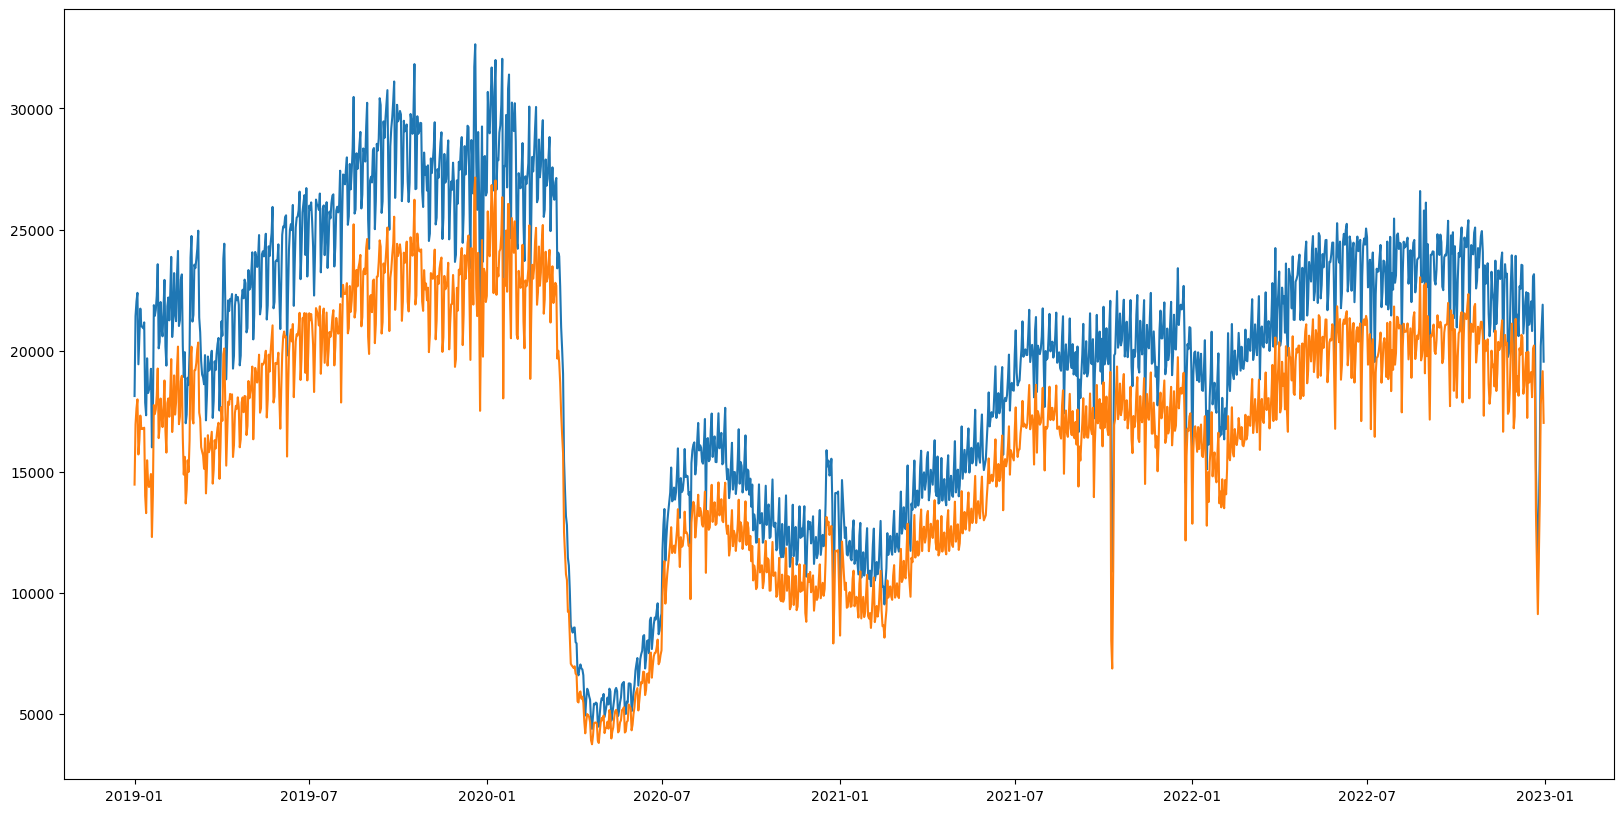

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.plot(count_after['callsign'])
plt.show()

In [22]:

icao_set = set(icao['icao'])
destination_set = set(filtered_com_major['destination'])

# Calculate elements in row 0 not in row 1
dest_not_in_icao = destination_set.difference(icao_set)
dest_not_in_icao

{'CT08',
 'NC13',
 'WN26',
 '0NC7',
 '17IN',
 'LICL',
 'NZRT',
 'EFGE',
 '69XA',
 'K3U3',
 'WA61',
 'LFEI',
 'EIBA',
 'EDLC',
 '97MT',
 '0LA9',
 'UUWW',
 'EKMN',
 'WI1B',
 '5TX4',
 '6WN5',
 '33VA',
 'K2R5',
 'PA35',
 '00NC',
 '8OH8',
 'EYNA',
 'NZLE',
 'KJNX',
 '9SD8',
 '50NC',
 'EYVP',
 'EGMF',
 '87IS',
 'WN35',
 'EKHK',
 'EKFS',
 'EDVL',
 'CNP3',
 '49II',
 'WI78',
 'KT82',
 'XS70',
 'LFGR',
 '36OK',
 '8OR3',
 '38PA',
 'GE35',
 'LFFW',
 '4FL3',
 'OH66',
 '92XS',
 'ESKX',
 'K21F',
 'LFEN',
 '74IN',
 '6IL6',
 'LSZG',
 '83LL',
 '2TX4',
 '4PA0',
 'SN36',
 '2MD4',
 '54AZ',
 'PA02',
 'K9D9',
 'MI78',
 'SSVQ',
 'ESGI',
 'NC56',
 'K1B2',
 '3TA7',
 'VT45',
 'HE39',
 '47AZ',
 'CT01',
 'LENA',
 'KLCG',
 '3OK9',
 'SC51',
 'ME47',
 '0FA1',
 'AZ67',
 'SN00',
 'K7V9',
 'MT52',
 'TE40',
 'IL54',
 'KHRJ',
 'ID43',
 'CL04',
 'MT22',
 '5OI0',
 'UB12',
 'CA39',
 'K2I3',
 'NH39',
 'KSNH',
 'SDJA',
 'SWJX',
 '78GA',
 '4WA1',
 '24CT',
 'CMF2',
 '39FD',
 'WS31',
 'SC89',
 '51GA',
 'EDQX',
 'RJNH',
 'MU12',
 

In [23]:
len(dest_not_in_icao)

8319

In [24]:
count_after.to_csv(r"D:\My_Documents\master_NYU\24spring\MLC\final\Flight.csv", index=True)

# GP

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, RBF, WhiteKernel, ExpSineSquared, Matern, RationalQuadratic
from statsmodels.tsa.stattools import acf, pacf,adfuller, kpss,range_unit_root_test # BDS for inped
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


In [12]:
Flight=pd.read_csv(r"D:\My_Documents\master_NYU\24spring\MLC\final\Flight.csv")
Flight

day  callsign  typecode  origin  destination  \
0     2019-01-01 00:00:00+00:00     14471     14471   14471        14471   
1     2019-01-02 00:00:00+00:00     16955     16955   16955        16955   
2     2019-01-03 00:00:00+00:00     17618     17618   17618        17618   
3     2019-01-04 00:00:00+00:00     17989     17989   17989        17989   
4     2019-01-05 00:00:00+00:00     15715     15715   15715        15715   
...                         ...       ...       ...     ...          ...   
1453  2022-12-27 00:00:00+00:00     13765     13765   13765        13765   
1454  2022-12-28 00:00:00+00:00     17778     17778   17778        17778   
1455  2022-12-29 00:00:00+00:00     18448     18448   18448        18448   
1456  2022-12-30 00:00:00+00:00     19151     19151   19151        19151   
1457  2022-12-31 00:00:00+00:00     17018     17018   17018        17018   

      firstseen  lastseen  Olatitude  Olongitude  Dlatitude  Dlongitude  
0         14471     14471      14471       14471      14471       14471  
1         16955     16955      16955       16955      16955       16955  
2         17618     17618      17618       17618      17618       17618  
3         17989     17989      17989       17989      17989       17989  
4         15715     15715      15715       15715      15715       15715  
...         ...       ...        ...         ...        ...         ...  
1453      13765     13765      13765       13765      13765       13765  
1454      17778     17778      17778       17778      17778       17778  
1455      18448     18448      18448       18448      18448       18448  
1456      19151     19151      19151       19151      19151       19151  
1457      17018     17018      17018       17018      17018       17018  

[1458 rows x 11 columns]

## 2021-2022 
Select data from 01/01/2021, since 2021 and 2022 appear to be on a yearly periodicity in terms of time-series analysis.

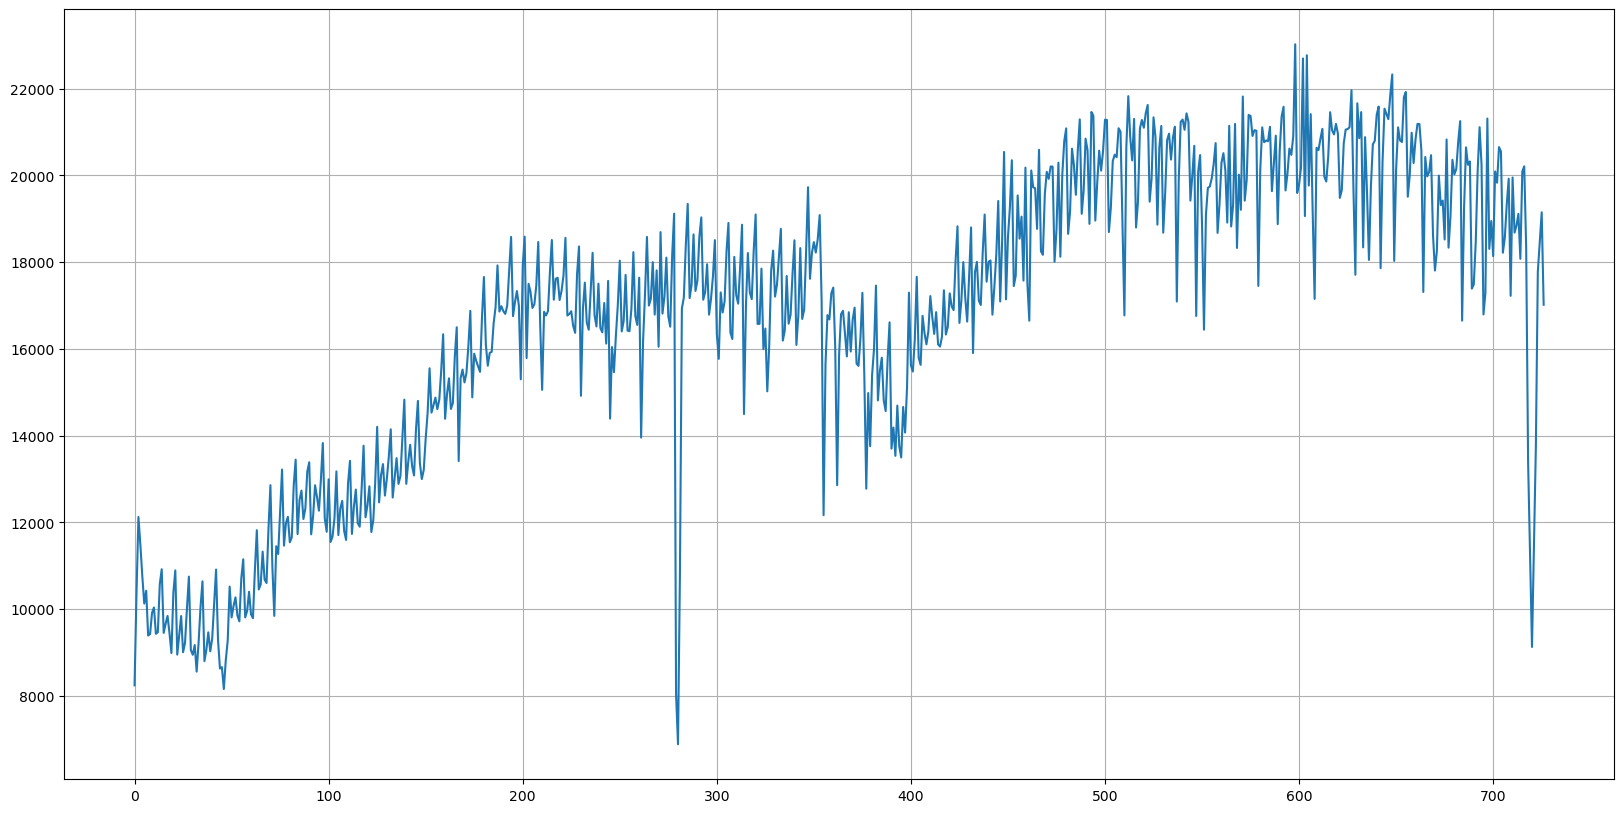

In [13]:
Flight['day'] = pd.to_datetime(Flight['day'])
st = '2021-01-01'
ed = '2022-12-31'
Flight_1 = Flight.loc[(Flight['day'] >= st) & (Flight['day'] <= ed), ['day', 'callsign']]
Flight_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(Flight_1['callsign'])
plt.show()

### week period

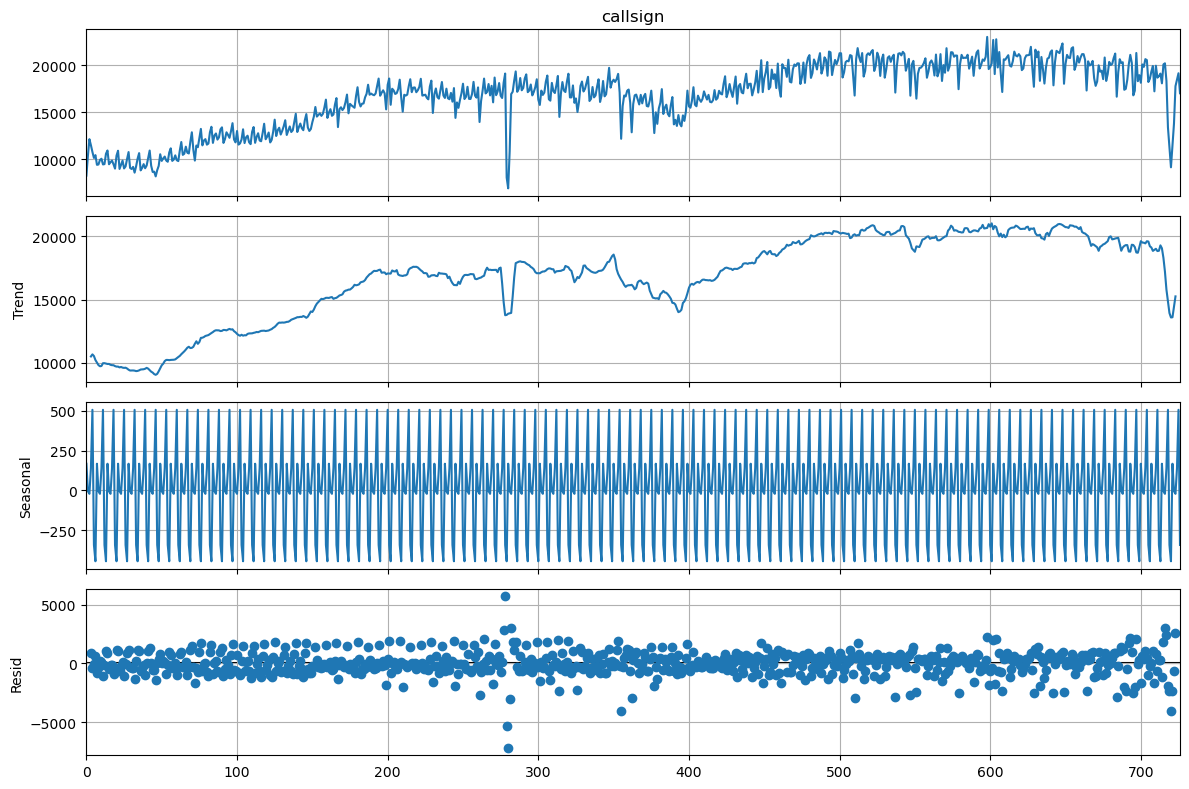

In [14]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(Flight_1['callsign'],model='additive',period=7)
res.plot()
plt.show()

### month period + anomaly detection

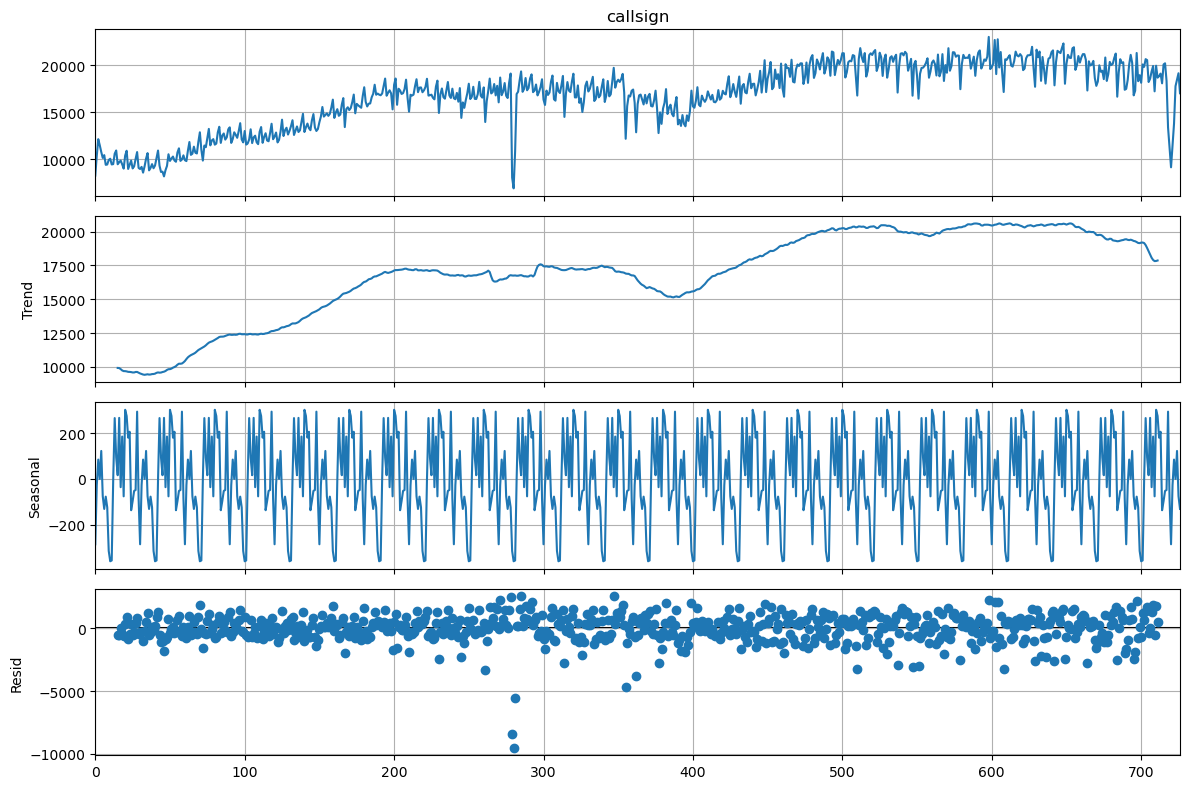

In [15]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(Flight_1['callsign'],model='additive',period=30)
res.plot()
plt.show()

279   -8409.114243
280   -9511.693229
281   -5556.909171
355   -4637.995403
362   -3784.571490
Name: resid, dtype: float64

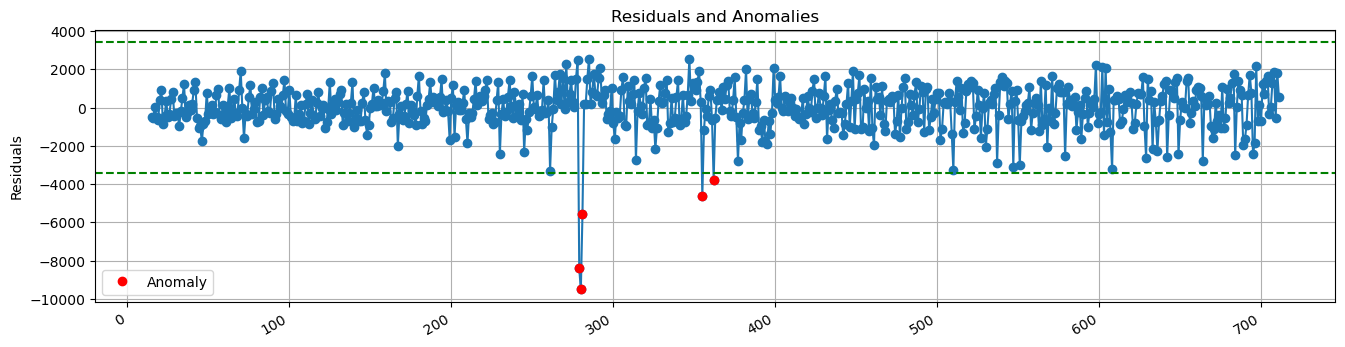

In [16]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [17]:
Flight_anom = Flight_1[~Flight_1.index.isin(anom.index)]
Flight_anom[710:]

day  callsign
715 2022-12-20 00:00:00+00:00     20092
716 2022-12-21 00:00:00+00:00     20212
717 2022-12-22 00:00:00+00:00     18334
718 2022-12-23 00:00:00+00:00     13376
719 2022-12-24 00:00:00+00:00     11242
720 2022-12-25 00:00:00+00:00      9124
721 2022-12-26 00:00:00+00:00     11450
722 2022-12-27 00:00:00+00:00     13765
723 2022-12-28 00:00:00+00:00     17778
724 2022-12-29 00:00:00+00:00     18448
725 2022-12-30 00:00:00+00:00     19151
726 2022-12-31 00:00:00+00:00     17018

## GP

In [28]:


e_train = '2022-08-31'
s_test = '2022-09-01'

train_all = Flight_anom.loc[(Flight_anom['day'] <= e_train), ['day', 'callsign']]
test_all = Flight_anom.loc[(Flight_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarnin

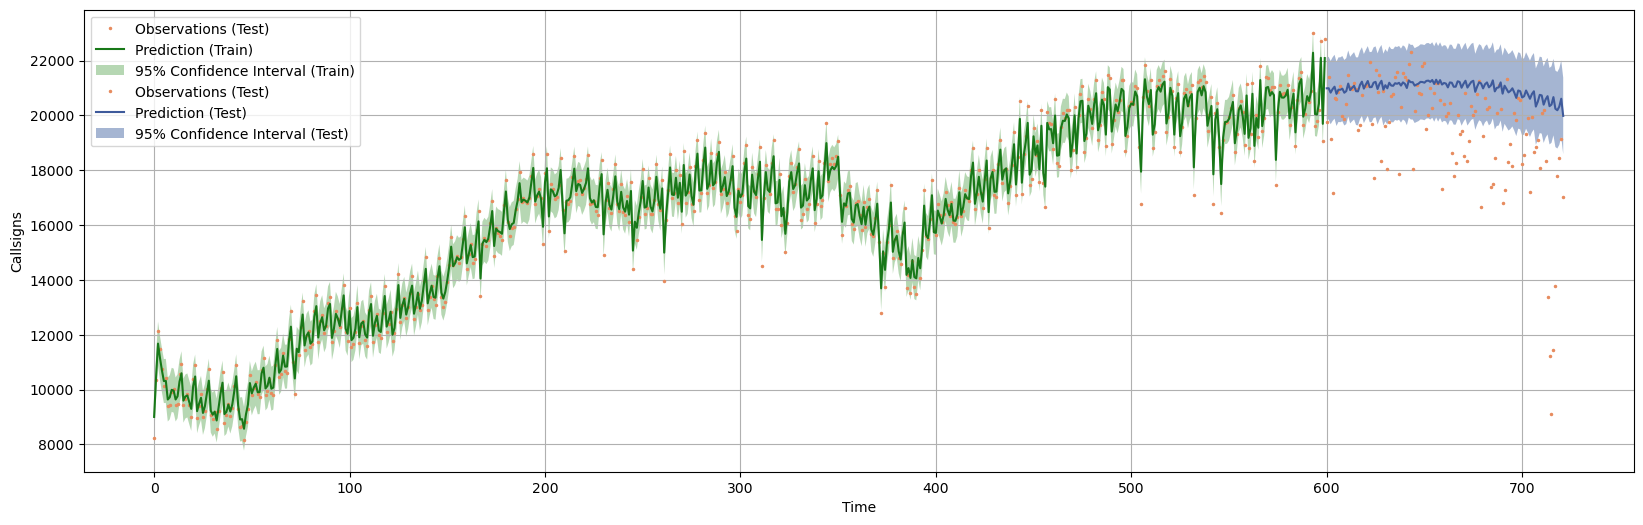

Log Marginal Likelihood (optimized): -5347.588616935177
Optimized Kernel: 
 316**2 * Matern(length_scale=0.0136, nu=1.5) + DotProduct(sigma_0=2.32e+04) + 316**2 * RationalQuadratic(alpha=1.09, length_scale=0.518) + 316**2 * RBF(length_scale=24.6) + WhiteKernel(noise_level=1e+05) + 128**2 * ExpSineSquared(length_scale=0.0573, periodicity=30.8) + 316**2 * ExpSineSquared(length_scale=0.635, periodicity=360)


In [30]:
X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1000.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarnin

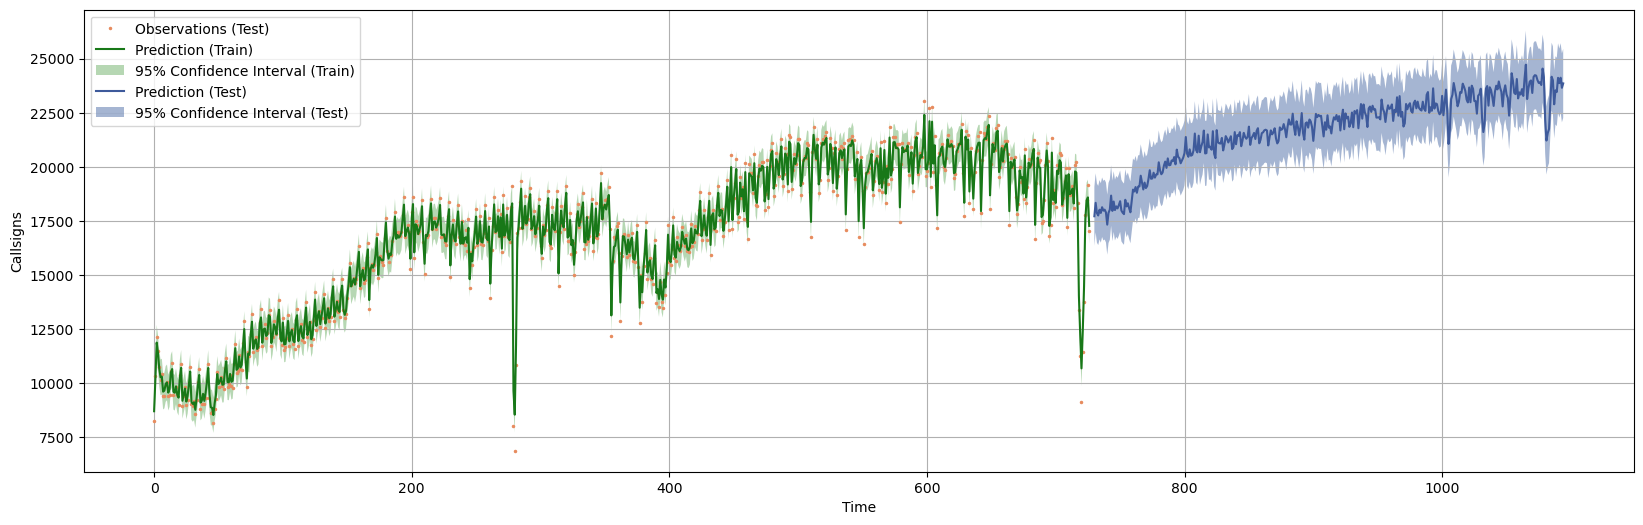

Log Marginal Likelihood (optimized): -6823.333660898841
Optimized Kernel: 
 316**2 * Matern(length_scale=0.0848, nu=1.5) + DotProduct(sigma_0=1.15e+04) + 316**2 * RationalQuadratic(alpha=1e+05, length_scale=1.17) + 316**2 * RBF(length_scale=35.6) + WhiteKernel(noise_level=1e+05) + 316**2 * ExpSineSquared(length_scale=0.01, periodicity=30.1) + 316**2 * ExpSineSquared(length_scale=0.0103, periodicity=363)


In [32]:
X_train = Flight_1.index.values.reshape(-1, 1)
y_train = Flight_1['callsign'].values
X_test = np.arange(365*2, 365*3).reshape(-1, 1)

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1000.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__k1__k2__length_scale is close to the specified lower bound 5.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may

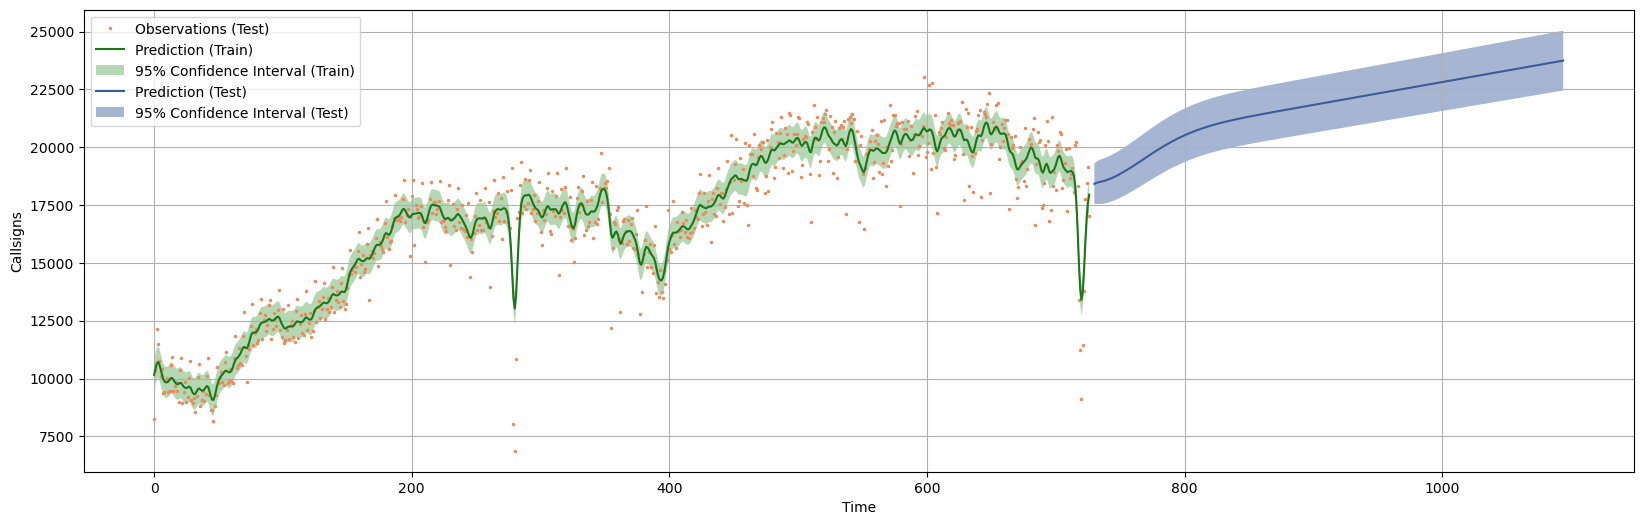

Log Marginal Likelihood (optimized): -9351.557826891083
Optimized Kernel: 
 316**2 * Matern(length_scale=5, nu=1.5) + DotProduct(sigma_0=1.29e+04) + 316**2 * RationalQuadratic(alpha=2.19e-05, length_scale=808) + 316**2 * RBF(length_scale=41) + WhiteKernel(noise_level=1e+05) + 261**2 * ExpSineSquared(length_scale=645, periodicity=30.6) + 316**2 * ExpSineSquared(length_scale=641, periodicity=364)


In [33]:
X_train = Flight_1.index.values.reshape(-1, 1)
y_train = Flight_1['callsign'].values
X_test = np.arange(365*2, 365*3).reshape(-1, 1)

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(5, 1000.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=50, length_scale_bounds=(5, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(5, 1000.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

## 2019-2020 Before Covid

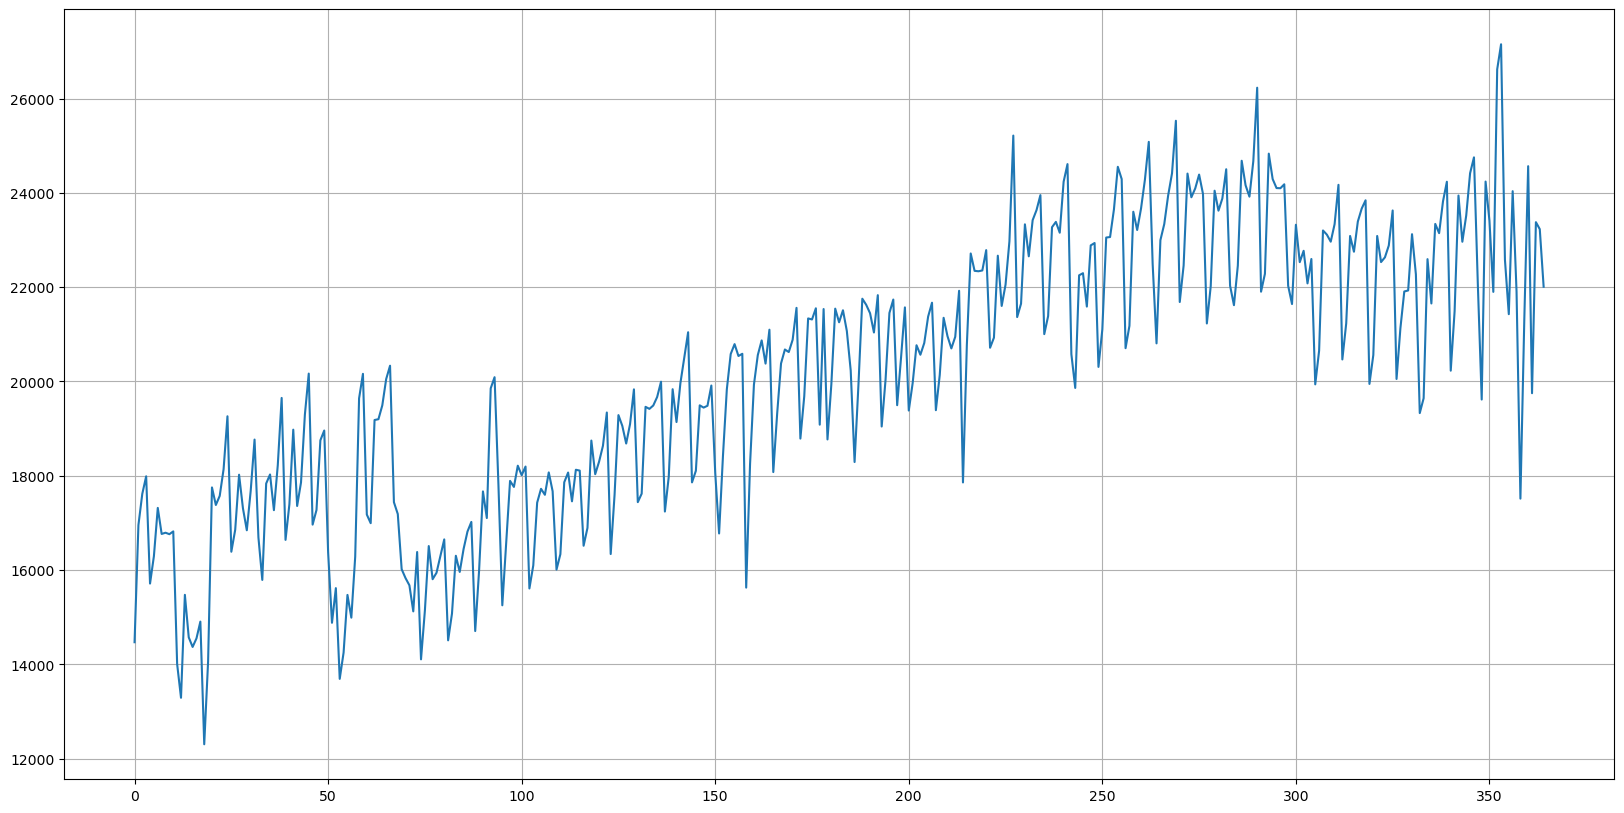

In [34]:
Flight['day'] = pd.to_datetime(Flight['day'])
st = '2019-01-01'
ed = '2019-12-31'
Flight_2 = Flight.loc[(Flight['day'] >= st) & (Flight['day'] <= ed), ['day', 'callsign']]
Flight_2.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(Flight_2['callsign'])
plt.show()

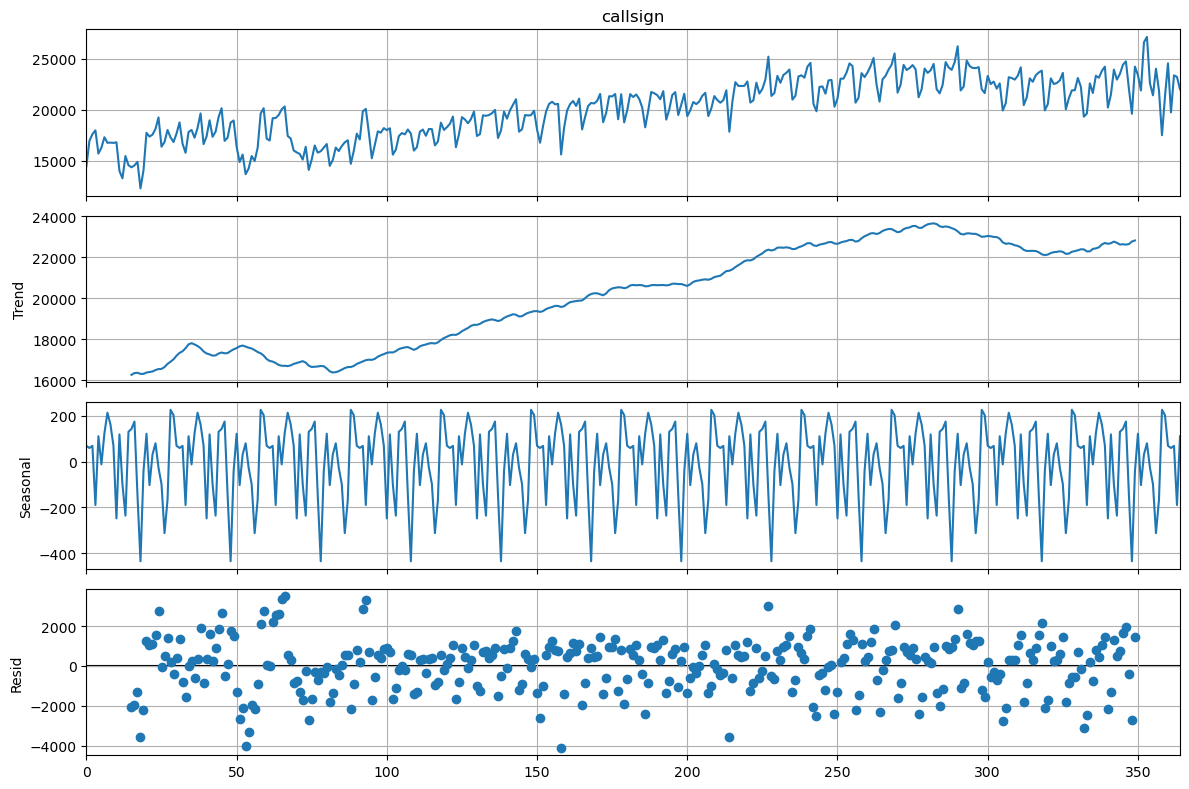

In [35]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(Flight_2['callsign'],model='additive',period=30)
res.plot()
plt.show()

53    -4030.634571
158   -4110.778510
Name: resid, dtype: float64

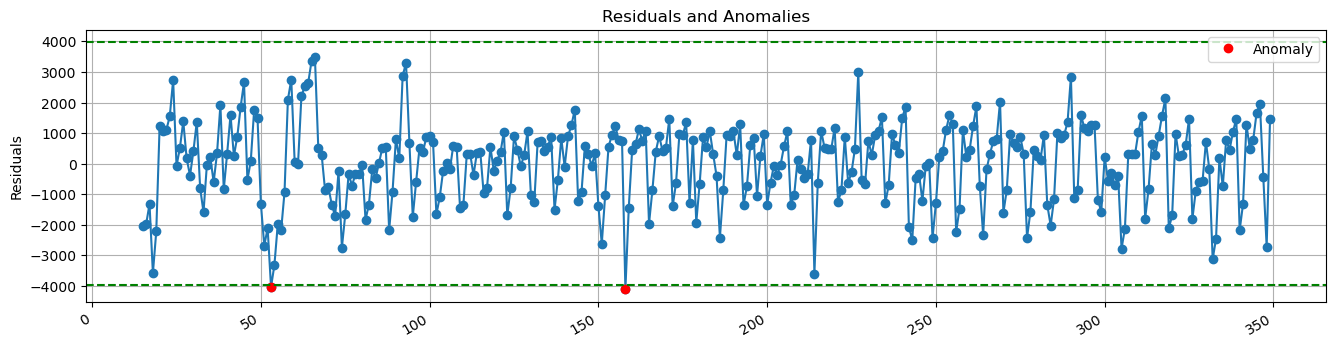

In [36]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [37]:
Flight_anom = Flight_2[~Flight_2.index.isin(anom.index)]


e_train = '2019-10-31'
s_test = '2019-11-01'

train_all = Flight_anom.loc[(Flight_anom['day'] <= e_train), ['day', 'callsign']]
test_all = Flight_anom.loc[(Flight_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)

## GP

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarnin

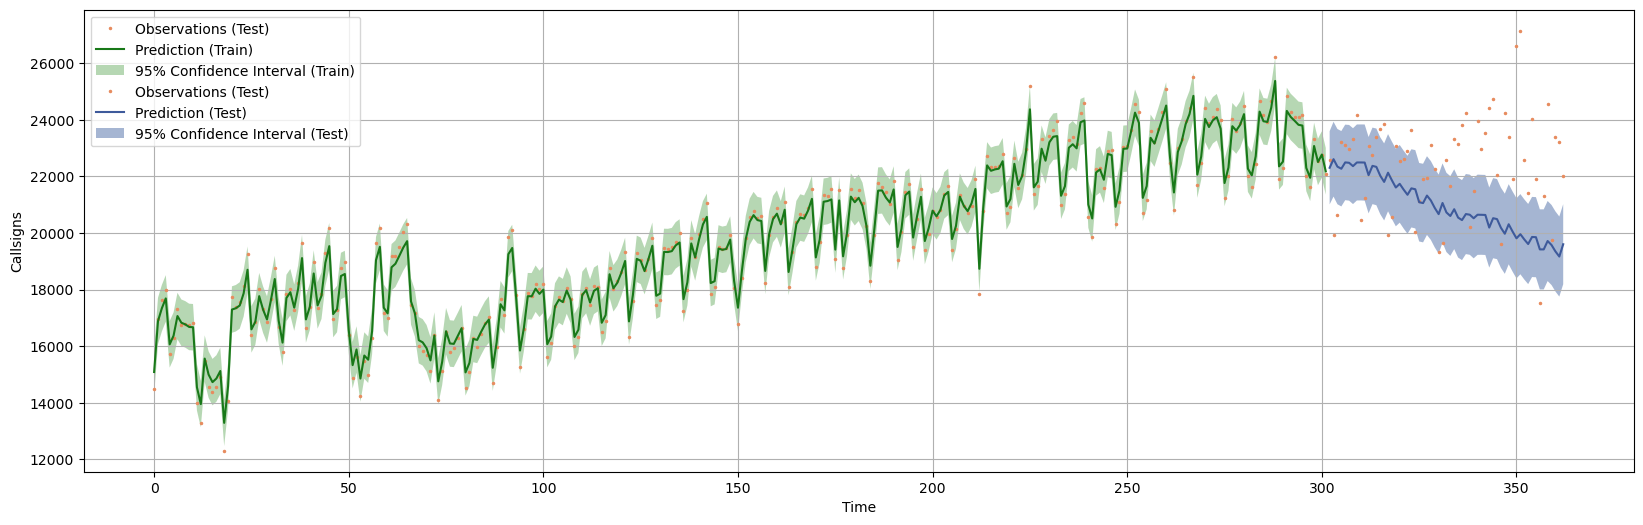

Log Marginal Likelihood (optimized): -2947.6534113824973
Optimized Kernel: 
 316**2 * Matern(length_scale=1.2e-32, nu=1.5) + DotProduct(sigma_0=1.84e+04) + 316**2 * RationalQuadratic(alpha=9.19e+04, length_scale=1.11) + 316**2 * RBF(length_scale=0.025) + WhiteKernel(noise_level=1e+05) + 248**2 * ExpSineSquared(length_scale=0.01, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.547, periodicity=365)


In [38]:
X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 50.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 50.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 50.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 0.5)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 5))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1895: RuntimeWarning: divide by zero encountered in divide
  tmp = dists / (2 * self.alpha * self.length_scale**2)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1895: RuntimeWarning: invalid value encountered in divide
  tmp = dists / (2 * self.alpha * self.length_scale**2)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1908: RuntimeWarning: invalid value encountered in multiply
  length_scale_gradient = dists * K / (self.length_scale**2 * base)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1917: RuntimeWarning: invalid value encountered in multiply
  + dists / (

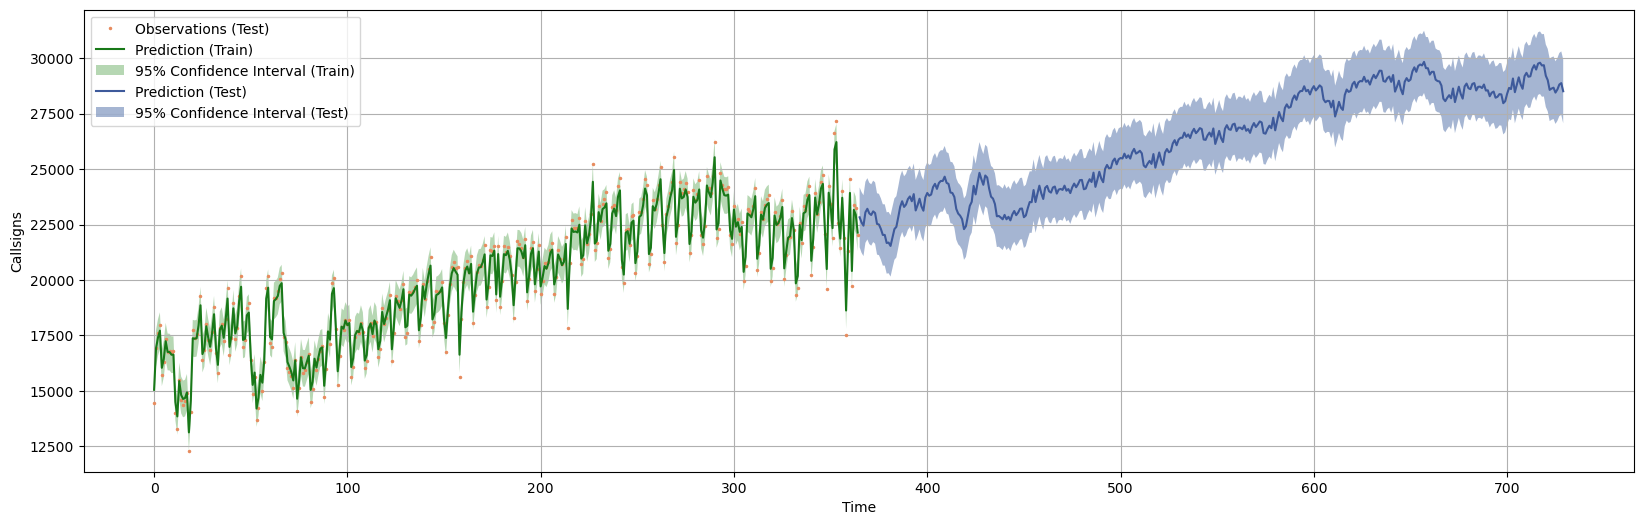

Log Marginal Likelihood (optimized): -3749.474479552617
Optimized Kernel: 
 316**2 * Matern(length_scale=7.27e-12, nu=1.5) + DotProduct(sigma_0=7.32e+04) + 316**2 * RationalQuadratic(alpha=7.24, length_scale=5.79e-15) + 316**2 * RBF(length_scale=0.625) + WhiteKernel(noise_level=1e+05) + 316**2 * ExpSineSquared(length_scale=0.01, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.0667, periodicity=365)


In [42]:
X_train = Flight_2.index.values.reshape(-1, 1)
y_train = Flight_2['callsign'].values
X_test = np.arange(365, 365*2).reshape(-1, 1)


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 50.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 50.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 50.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 0.5)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 5))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:334: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1895: RuntimeWarning: divide by zero encountered in divide
  tmp = dists / (2 * self.alpha * self.length_scale**2)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1895: RuntimeWarning: invalid value encountered in divide
  tmp = dists / (2 * self.alpha * self.length_scale**2)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1908: RuntimeWarning: invalid value encountered in multiply
  length_scale_gradient = dists * K / (self.length_scale**2 * base)
D:\Program_Files\Anaconda\envs\pyproj_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:1917: RuntimeWarning: invalid value encountered in multiply
  + dists / (

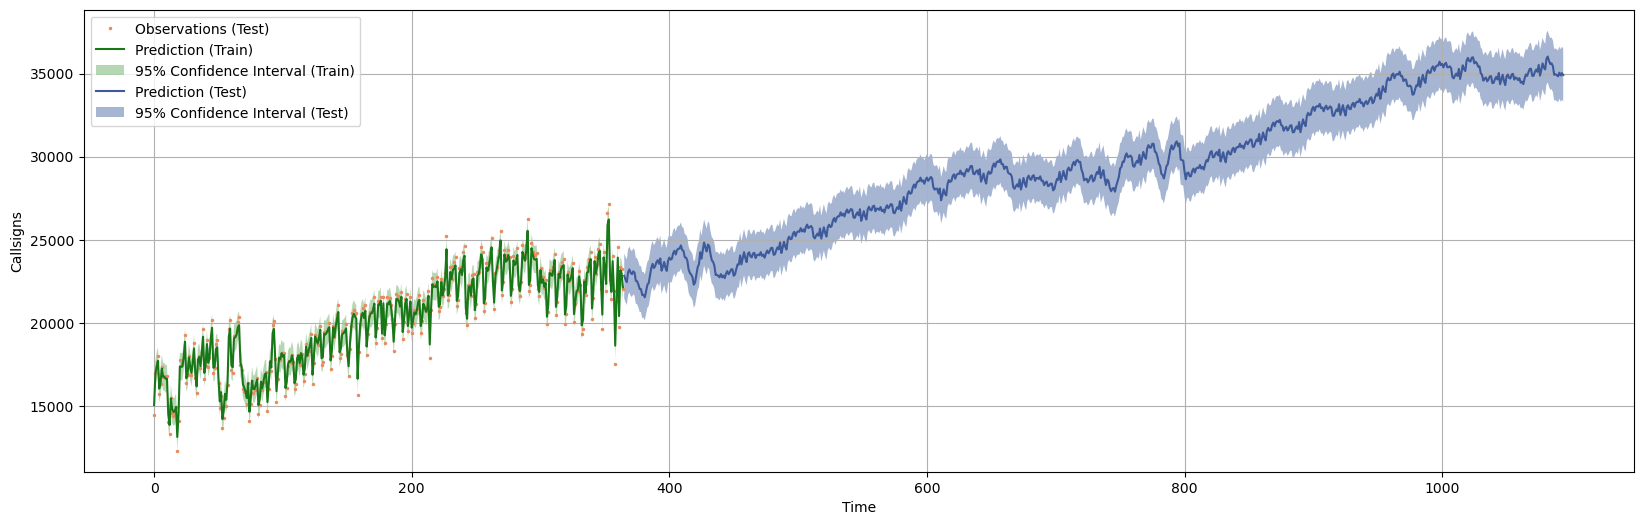

Log Marginal Likelihood (optimized): -3749.474479552617
Optimized Kernel: 
 316**2 * Matern(length_scale=7.27e-12, nu=1.5) + DotProduct(sigma_0=7.32e+04) + 316**2 * RationalQuadratic(alpha=7.24, length_scale=5.79e-15) + 316**2 * RBF(length_scale=0.625) + WhiteKernel(noise_level=1e+05) + 316**2 * ExpSineSquared(length_scale=0.01, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.0667, periodicity=365)


In [40]:
X_train = Flight_2.index.values.reshape(-1, 1)
y_train = Flight_2['callsign'].values
X_test = np.arange(365, 365*3).reshape(-1, 1)


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 50.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 50.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 50.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 0.5)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-2, 5))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

# GP by type

## by type by date

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [44]:
data2=pd.read_csv(r"D:\My_Documents\master_NYU\24spring\MLC\final\filtered_com_major_final.csv")
data2

Unnamed: 0 callsign typecode origin destination  \
0                  0   CES219     A332   YSSY        EDDF   
1                  1   AEA040     A332   LEMD        LEMD   
2                  2   CXA825     B788   YSSY        LFPG   
3                  3   CLU211     B744   UUEE        EDDF   
4                  4   ETH704     B788   KLDJ        LFPG   
...              ...      ...      ...    ...         ...   
24187788    24187788     JZA5     DH8D   CYOW        CYUL   
24187789    24187789  PDT6131     E145   KMDT        KPHL   
24187790    24187790   JZA319     DH8D   CYQQ        CYVR   
24187791    24187791  ENY3800     E145   KORD        KCMI   
24187792    24187792   VTE565     E145   KMQY        KBNA   

                          firstseen                   lastseen  \
0         2018-12-31 01:05:29+00:00  2019-01-01 04:09:29+00:00   
1         2018-12-31 01:07:21+00:00  2019-01-01 03:32:59+00:00   
2         2018-12-31 01:18:29+00:00  2019-01-01 04:32:28+00:00   
3         2018-12-31 01:49:28+00:00  2019-01-01 04:11:38+00:00   
4         2018-12-31 03:31:48+00:00  2019-01-01 04:30:10+00:00   
...                             ...                        ...   
24187788  2022-12-31 23:28:14+00:00  2022-12-31 23:53:59+00:00   
24187789  2022-12-31 23:29:15+00:00  2022-12-31 23:50:46+00:00   
24187790  2022-12-31 23:30:43+00:00  2022-12-31 23:51:42+00:00   
24187791  2022-12-31 23:30:50+00:00  2022-12-31 23:56:58+00:00   
24187792  2022-12-31 23:34:30+00:00  2022-12-31 23:47:15+00:00   

                                day  Olatitude  Olongitude  Dlatitude  \
0         2019-01-01 00:00:00+00:00   -33.9461   151.17700    50.0333   
1         2019-01-01 00:00:00+00:00    40.4719    -3.56264    40.4719   
2         2019-01-01 00:00:00+00:00   -33.9461   151.17700    49.0097   
3         2019-01-01 00:00:00+00:00    55.9728    37.41470    50.0333   
4         2019-01-01 00:00:00+00:00    40.6174   -74.24460    49.0097   
...                             ...        ...         ...        ...   
24187788  2022-12-31 00:00:00+00:00    45.3225   -75.66920    45.4657   
24187789  2022-12-31 00:00:00+00:00    40.1935   -76.76340    39.8719   
24187790  2022-12-31 00:00:00+00:00    49.7108  -124.88700    49.1939   
24187791  2022-12-31 00:00:00+00:00    41.9786   -87.90470    40.0392   
24187792  2022-12-31 00:00:00+00:00    36.0090   -86.52010    36.1245   

          Dlongitude  
0            8.57056  
1           -3.56264  
2            2.54778  
3            8.57056  
4            2.54778  
...              ...  
24187788   -73.74550  
24187789   -75.24110  
24187790  -123.18400  
24187791   -88.27810  
24187792   -86.67820  

[24187793 rows x 12 columns]

In [45]:
# Modify the lambda function for the new conditions
data2['type'] = data2['typecode'].apply(
    lambda x: 'A320' if x == 'A320' else (
        'A321' if x == 'A321' else (
            x[:3] if x[0] in ('A', 'B') else x
        )
    )
)

# Display the head of the DataFrame to check the new 'type' column
data2

Unnamed: 0 callsign typecode origin destination  \
0                  0   CES219     A332   YSSY        EDDF   
1                  1   AEA040     A332   LEMD        LEMD   
2                  2   CXA825     B788   YSSY        LFPG   
3                  3   CLU211     B744   UUEE        EDDF   
4                  4   ETH704     B788   KLDJ        LFPG   
...              ...      ...      ...    ...         ...   
24187788    24187788     JZA5     DH8D   CYOW        CYUL   
24187789    24187789  PDT6131     E145   KMDT        KPHL   
24187790    24187790   JZA319     DH8D   CYQQ        CYVR   
24187791    24187791  ENY3800     E145   KORD        KCMI   
24187792    24187792   VTE565     E145   KMQY        KBNA   

                          firstseen                   lastseen  \
0         2018-12-31 01:05:29+00:00  2019-01-01 04:09:29+00:00   
1         2018-12-31 01:07:21+00:00  2019-01-01 03:32:59+00:00   
2         2018-12-31 01:18:29+00:00  2019-01-01 04:32:28+00:00   
3         2018-12-31 01:49:28+00:00  2019-01-01 04:11:38+00:00   
4         2018-12-31 03:31:48+00:00  2019-01-01 04:30:10+00:00   
...                             ...                        ...   
24187788  2022-12-31 23:28:14+00:00  2022-12-31 23:53:59+00:00   
24187789  2022-12-31 23:29:15+00:00  2022-12-31 23:50:46+00:00   
24187790  2022-12-31 23:30:43+00:00  2022-12-31 23:51:42+00:00   
24187791  2022-12-31 23:30:50+00:00  2022-12-31 23:56:58+00:00   
24187792  2022-12-31 23:34:30+00:00  2022-12-31 23:47:15+00:00   

                                day  Olatitude  Olongitude  Dlatitude  \
0         2019-01-01 00:00:00+00:00   -33.9461   151.17700    50.0333   
1         2019-01-01 00:00:00+00:00    40.4719    -3.56264    40.4719   
2         2019-01-01 00:00:00+00:00   -33.9461   151.17700    49.0097   
3         2019-01-01 00:00:00+00:00    55.9728    37.41470    50.0333   
4         2019-01-01 00:00:00+00:00    40.6174   -74.24460    49.0097   
...                             ...        ...         ...        ...   
24187788  2022-12-31 00:00:00+00:00    45.3225   -75.66920    45.4657   
24187789  2022-12-31 00:00:00+00:00    40.1935   -76.76340    39.8719   
24187790  2022-12-31 00:00:00+00:00    49.7108  -124.88700    49.1939   
24187791  2022-12-31 00:00:00+00:00    41.9786   -87.90470    40.0392   
24187792  2022-12-31 00:00:00+00:00    36.0090   -86.52010    36.1245   

          Dlongitude  type  
0            8.57056   A33  
1           -3.56264   A33  
2            2.54778   B78  
3            8.57056   B74  
4            2.54778   B78  
...              ...   ...  
24187788   -73.74550  DH8D  
24187789   -75.24110  E145  
24187790  -123.18400  DH8D  
24187791   -88.27810  E145  
24187792   -86.67820  E145  

[24187793 rows x 13 columns]

In [46]:
sorted_array = sorted(data2['type'].unique())
sorted_array

['A30',
 'A31',
 'A32',
 'A320',
 'A321',
 'A33',
 'A34',
 'A35',
 'A38',
 'A39',
 'A3S',
 'B70',
 'B71',
 'B72',
 'B73',
 'B74',
 'B75',
 'B76',
 'B77',
 'B78',
 'BCS',
 'CRJ-1000',
 'CRJ1',
 'CRJ2',
 'CRJ7',
 'CRJ9',
 'CRJX',
 'DH2T',
 'DH8A',
 'DH8B',
 'DH8C',
 'DH8D',
 'DHC2',
 'DHC3',
 'DHC6',
 'DHC7',
 'DHC8',
 'DHT',
 'E110',
 'E120',
 'E135',
 'E140',
 'E145',
 'E170',
 'E175',
 'E190',
 'E195']

In [47]:
wide=['A34',
 'A35',
 'A38',
 'B77',
'B74','A39']
mid=['A33',
     'B75',
     'B76',
     'B78']
narrow = ['A30',
 'A31',
 'A32',
 'A320',
 'A321',
 'B70',
 'B71',
 'B72',
 'B73',
 'BCS',
 'CRJ-1000',
 'CRJ1',
 'CRJ2',
 'CRJ7',
 'CRJ9',
 'CRJX',
 'DH2T',
 'DH8A',
 'DH8B',
 'DH8C',
 'DH8D',
 'DHC2',
 'DHC3',
 'DHC6',
 'DHC7',
 'DHC8',
 'DHT',
 'E110',
 'E120',
 'E135',
 'E140',
 'E145',
 'E170',
 'E175',
 'E190',
 'E195']

In [48]:
def categorize_type(x):
    if x.startswith(tuple(wide)):
        return 'wide'
    elif x.startswith(tuple(mid)):
        return 'mid'
    elif x.startswith(tuple(narrow)):
        return 'narrow'
    else:
        return None

data2['typetype'] = data2['type'].apply(categorize_type)
data2

Unnamed: 0 callsign typecode origin destination  \
0                  0   CES219     A332   YSSY        EDDF   
1                  1   AEA040     A332   LEMD        LEMD   
2                  2   CXA825     B788   YSSY        LFPG   
3                  3   CLU211     B744   UUEE        EDDF   
4                  4   ETH704     B788   KLDJ        LFPG   
...              ...      ...      ...    ...         ...   
24187788    24187788     JZA5     DH8D   CYOW        CYUL   
24187789    24187789  PDT6131     E145   KMDT        KPHL   
24187790    24187790   JZA319     DH8D   CYQQ        CYVR   
24187791    24187791  ENY3800     E145   KORD        KCMI   
24187792    24187792   VTE565     E145   KMQY        KBNA   

                          firstseen                   lastseen  \
0         2018-12-31 01:05:29+00:00  2019-01-01 04:09:29+00:00   
1         2018-12-31 01:07:21+00:00  2019-01-01 03:32:59+00:00   
2         2018-12-31 01:18:29+00:00  2019-01-01 04:32:28+00:00   
3         2018-12-31 01:49:28+00:00  2019-01-01 04:11:38+00:00   
4         2018-12-31 03:31:48+00:00  2019-01-01 04:30:10+00:00   
...                             ...                        ...   
24187788  2022-12-31 23:28:14+00:00  2022-12-31 23:53:59+00:00   
24187789  2022-12-31 23:29:15+00:00  2022-12-31 23:50:46+00:00   
24187790  2022-12-31 23:30:43+00:00  2022-12-31 23:51:42+00:00   
24187791  2022-12-31 23:30:50+00:00  2022-12-31 23:56:58+00:00   
24187792  2022-12-31 23:34:30+00:00  2022-12-31 23:47:15+00:00   

                                day  Olatitude  Olongitude  Dlatitude  \
0         2019-01-01 00:00:00+00:00   -33.9461   151.17700    50.0333   
1         2019-01-01 00:00:00+00:00    40.4719    -3.56264    40.4719   
2         2019-01-01 00:00:00+00:00   -33.9461   151.17700    49.0097   
3         2019-01-01 00:00:00+00:00    55.9728    37.41470    50.0333   
4         2019-01-01 00:00:00+00:00    40.6174   -74.24460    49.0097   
...                             ...        ...         ...        ...   
24187788  2022-12-31 00:00:00+00:00    45.3225   -75.66920    45.4657   
24187789  2022-12-31 00:00:00+00:00    40.1935   -76.76340    39.8719   
24187790  2022-12-31 00:00:00+00:00    49.7108  -124.88700    49.1939   
24187791  2022-12-31 00:00:00+00:00    41.9786   -87.90470    40.0392   
24187792  2022-12-31 00:00:00+00:00    36.0090   -86.52010    36.1245   

          Dlongitude  type typetype  
0            8.57056   A33      mid  
1           -3.56264   A33      mid  
2            2.54778   B78      mid  
3            8.57056   B74     wide  
4            2.54778   B78      mid  
...              ...   ...      ...  
24187788   -73.74550  DH8D   narrow  
24187789   -75.24110  E145   narrow  
24187790  -123.18400  DH8D   narrow  
24187791   -88.27810  E145   narrow  
24187792   -86.67820  E145   narrow  

[24187793 rows x 14 columns]

In [49]:
wide=data2[data2['typetype']=='wide'].groupby('day')['callsign'].count()
mid=data2[data2['typetype']=='mid'].groupby('day')['callsign'].count()
narrow=data2[data2['typetype']=='narrow'].groupby('day')['callsign'].count()

wide=pd.DataFrame(wide)
mid=pd.DataFrame(mid)
narrow=pd.DataFrame(narrow)

wide.reset_index(inplace=True, drop=False)
mid.reset_index(inplace=True, drop=False)
narrow.reset_index(inplace=True, drop=False)

## wide

In [50]:
wide

day  callsign
0     2019-01-01 00:00:00+00:00      1140
1     2019-01-02 00:00:00+00:00      1244
2     2019-01-03 00:00:00+00:00      1318
3     2019-01-04 00:00:00+00:00      1327
4     2019-01-05 00:00:00+00:00      1325
...                         ...       ...
1453  2022-12-27 00:00:00+00:00       629
1454  2022-12-28 00:00:00+00:00      1084
1455  2022-12-29 00:00:00+00:00      1132
1456  2022-12-30 00:00:00+00:00      1087
1457  2022-12-31 00:00:00+00:00      1097

[1458 rows x 2 columns]

### after

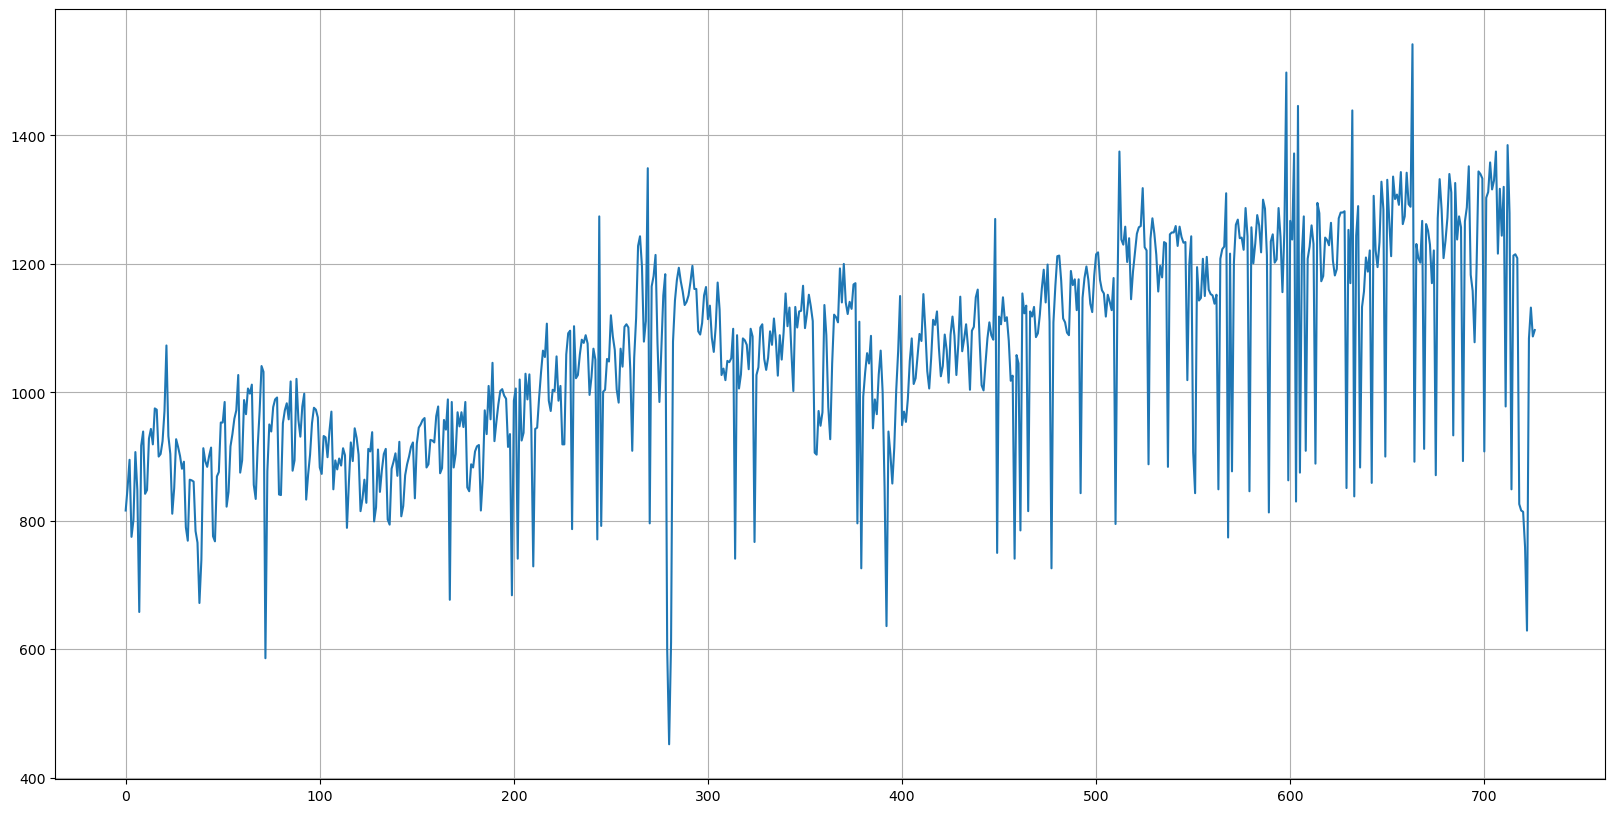

In [51]:
wide['day'] = pd.to_datetime(wide['day'])

st = '2021-01-01'

wide_1 = wide.loc[(wide['day'] >= st), ['day', 'callsign']]
wide_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(wide_1['callsign'])
plt.show()

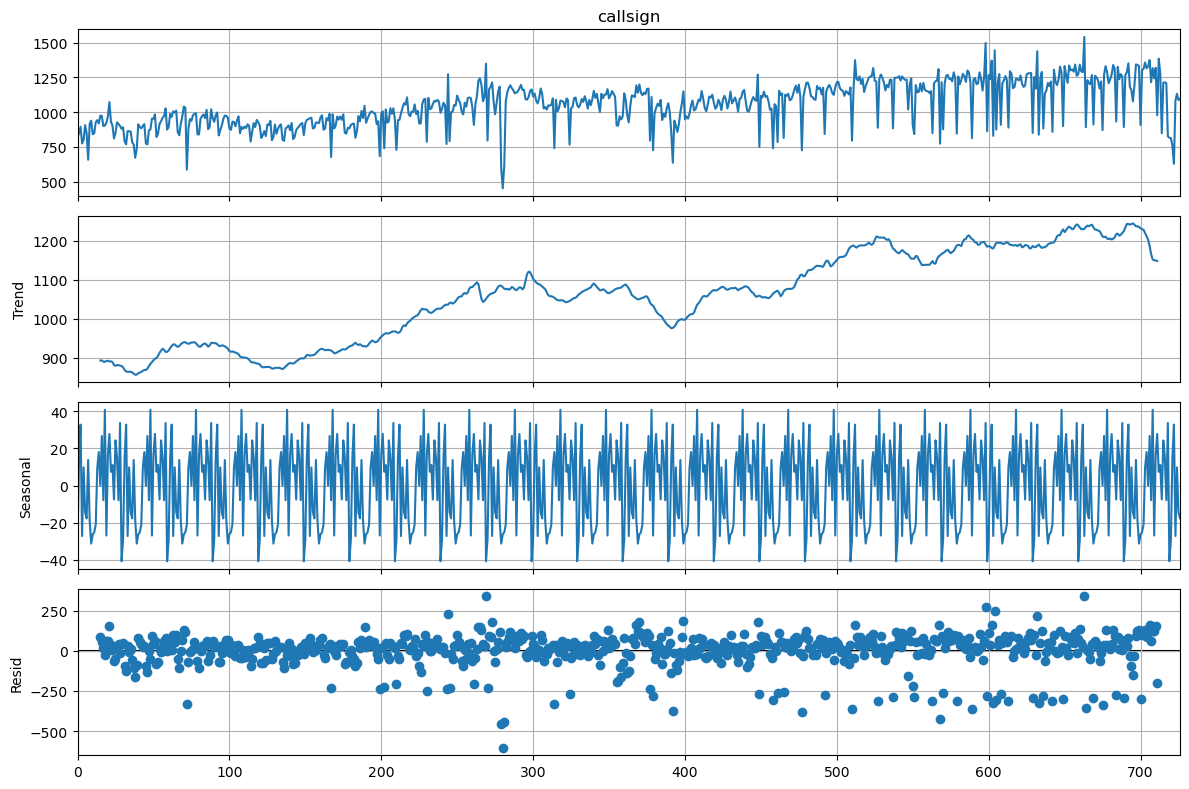

In [52]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(wide_1['callsign'],model='additive',period=30)
res.plot()
plt.show()

72    -329.714541
269    338.997053
279   -453.268889
280   -602.656570
281   -440.517440
314   -330.403671
392   -372.905845
477   -379.112367
510   -362.438454
568   -421.787005
589   -364.576105
603   -322.773237
633   -325.039903
663    339.093430
664   -352.916715
675   -339.768466
Name: resid, dtype: float64

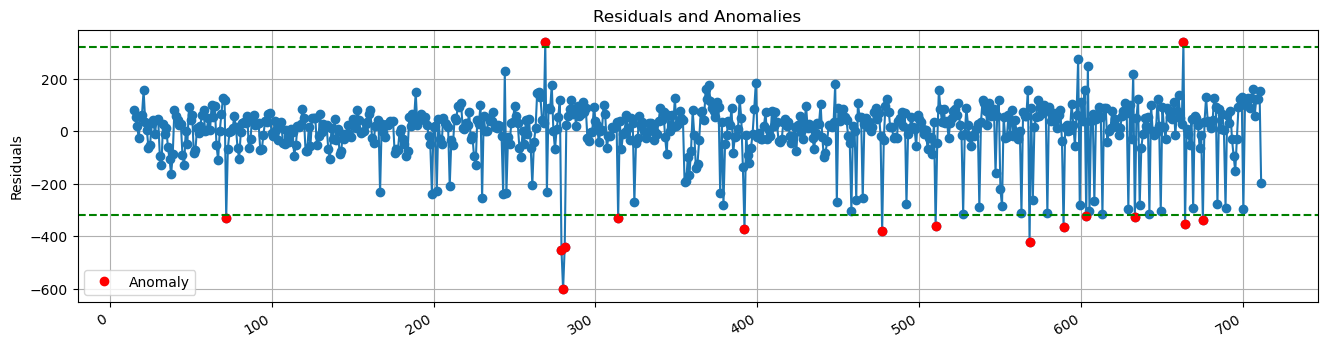

In [53]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [54]:
wide_1_anom = wide_1[~wide_1.index.isin(anom.index)]

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, RBF, WhiteKernel, ExpSineSquared, Matern, RationalQuadratic
from statsmodels.tsa.stattools import acf, pacf,adfuller, kpss,range_unit_root_test # BDS for inped
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [56]:
e_train = '2022-08-31'
s_test = '2022-09-01'

train_all = wide_1_anom.loc[(wide_1_anom['day'] <= e_train), ['day', 'callsign']]
test_all = wide_1_anom.loc[(wide_1_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)

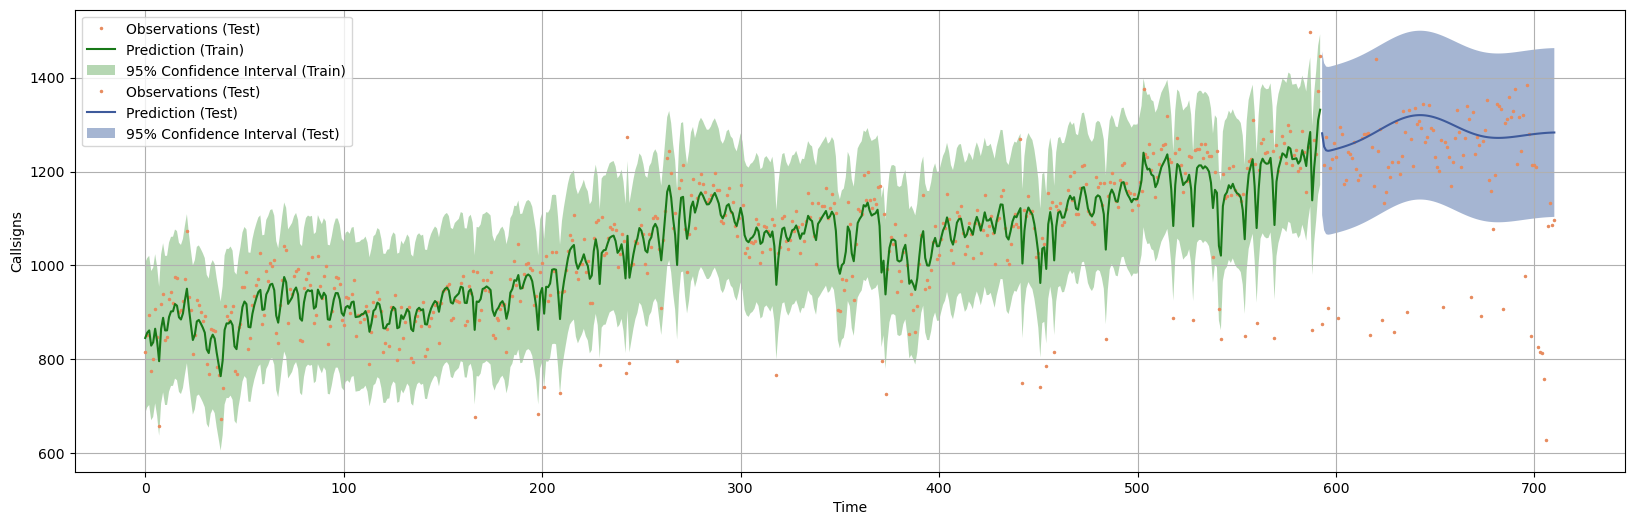

Log Marginal Likelihood (optimized): -3513.1271248576104
Optimized Kernel: 
 56.2**2 * Matern(length_scale=1, nu=1.5) + DotProduct(sigma_0=870) + 0.141**2 * RBF(length_scale=1) + WhiteKernel(noise_level=4.84e+03) + 9.66**2 * ExpSineSquared(length_scale=1e+03, periodicity=30) + 37.8**2 * ExpSineSquared(length_scale=0.388, periodicity=360)


In [57]:
X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1.0))+
    DotProduct()+
    # 1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-1, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

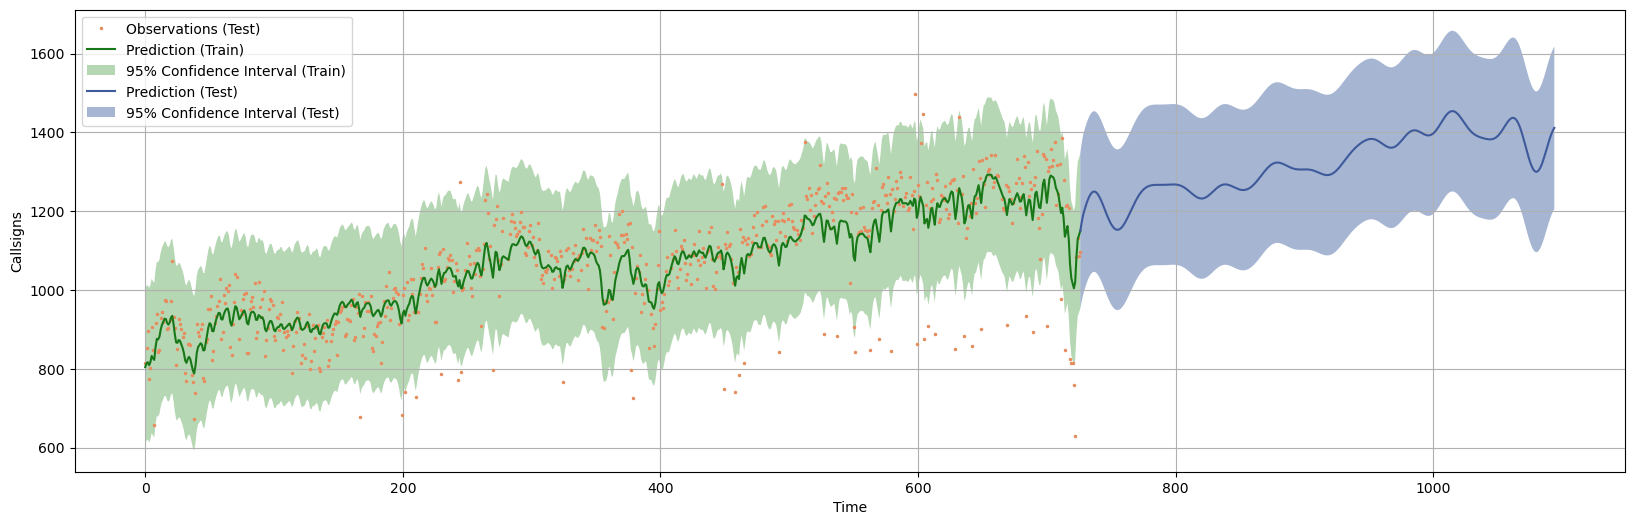

Log Marginal Likelihood (optimized): -4322.678825251027
Optimized Kernel: 
 17.4**2 * Matern(length_scale=1, nu=1.5) + DotProduct(sigma_0=1.66e+03) + 38**2 * RBF(length_scale=1) + WhiteKernel(noise_level=8.51e+03) + 60.4**2 * ExpSineSquared(length_scale=1e+03, periodicity=30) + 70.5**2 * ExpSineSquared(length_scale=0.209, periodicity=360)


In [58]:
X_train = wide_1_anom.index.values.reshape(-1, 1)
y_train = wide_1_anom['callsign'].values
X_test = np.arange(363*2, 365*3).reshape(-1, 1)

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1.0))+
    DotProduct()+
    # 1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-1, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

### before

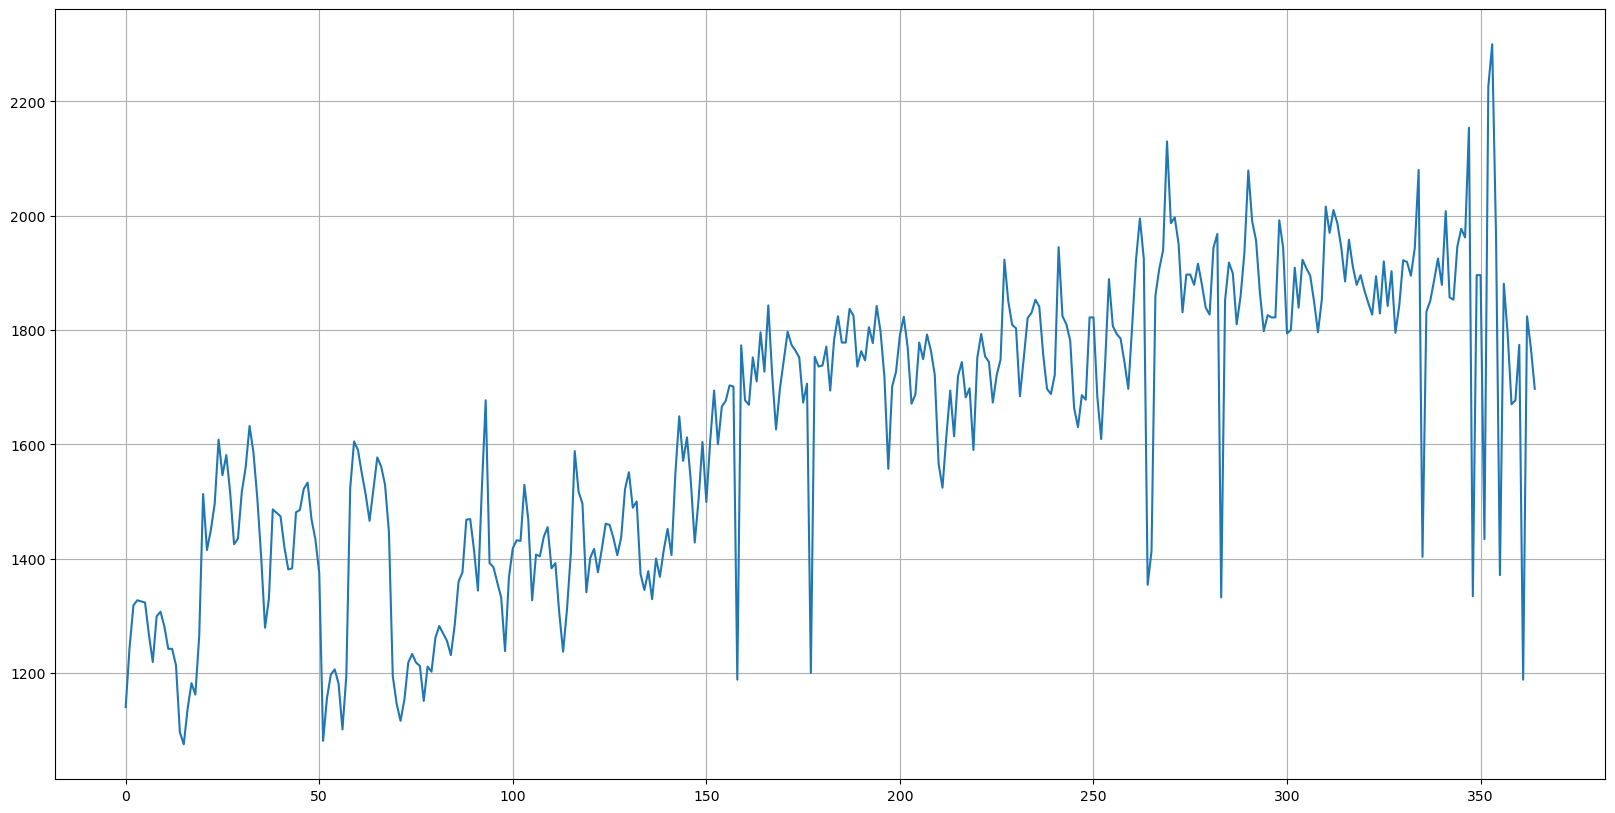

In [59]:
wide['day'] = pd.to_datetime(wide['day'])
st = '2019-01-01'
ed = '2019-12-31'
wide_2 = wide.loc[(wide['day'] >= st) & (wide['day'] <= ed), ['day', 'callsign']]
wide_2.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(wide_2['callsign'])
plt.show()

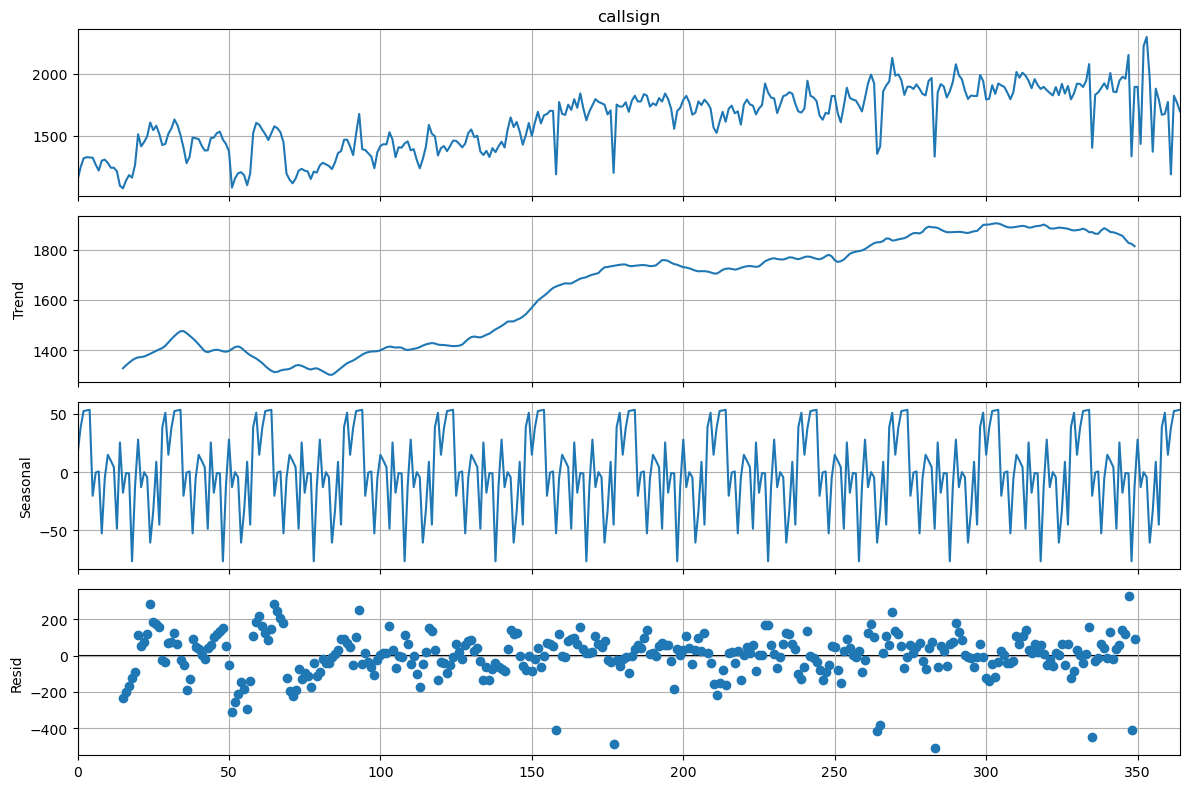

In [60]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(wide_2['callsign'],model='additive',period=30)
res.plot()
plt.show()

158   -412.724777
177   -490.641444
264   -414.955080
265   -383.479322
283   -508.342959
335   -446.789928
348   -412.497378
Name: resid, dtype: float64

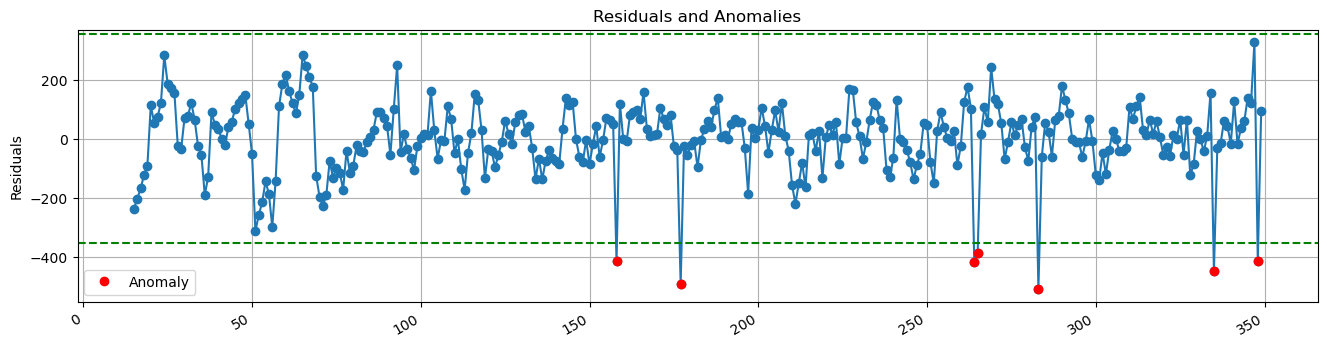

In [61]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

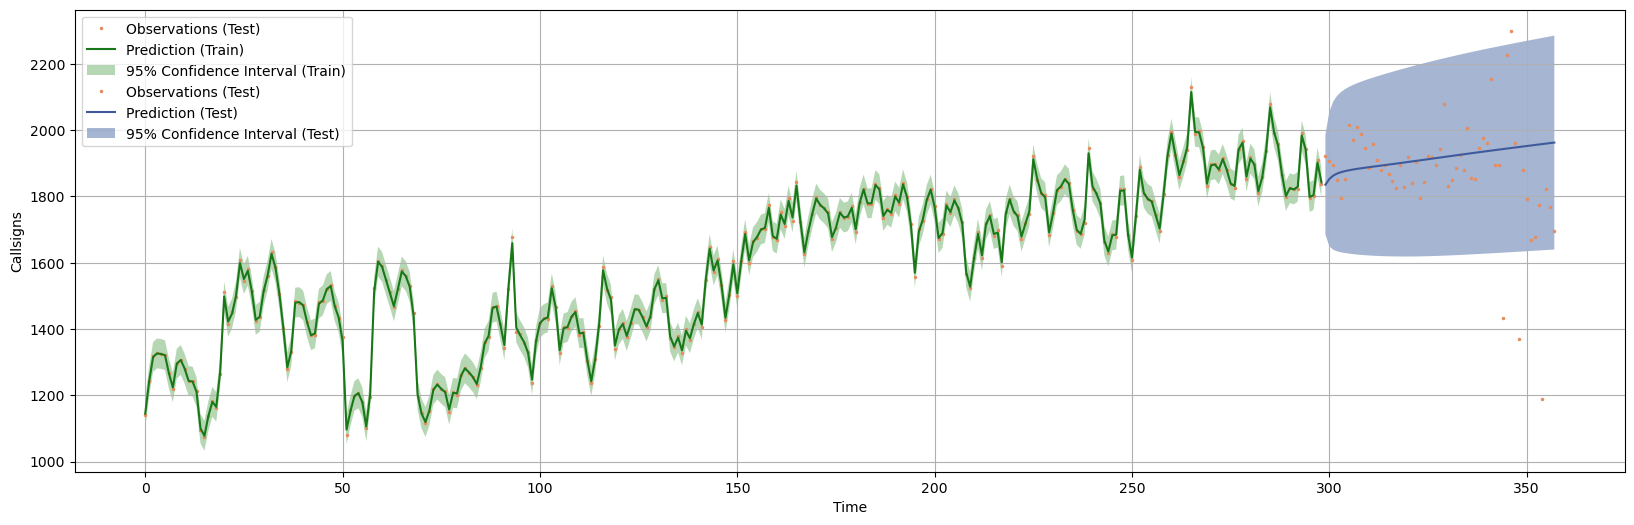

Log Marginal Likelihood (optimized): -1726.5773648098161
Optimized Kernel: 
 1.14**2 * Matern(length_scale=20, nu=1.5) + DotProduct(sigma_0=1.27e+03) + 121**2 * RationalQuadratic(alpha=0.381, length_scale=1.26) + 55.9**2 * RBF(length_scale=20) + WhiteKernel(noise_level=275) + 287**2 * ExpSineSquared(length_scale=8.41, periodicity=365)


In [62]:
wide_2_anom = wide_2[~wide_2.index.isin(anom.index)]

e_train = '2019-10-31'
s_test = '2019-11-01'

train_all = wide_2_anom.loc[(wide_2_anom['day'] <= e_train), ['day', 'callsign']]
test_all = wide_2_anom.loc[(wide_2_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)



X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 20.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 20.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 20.0)) +
    WhiteKernel(noise_level=2.63e+05) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    # 1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

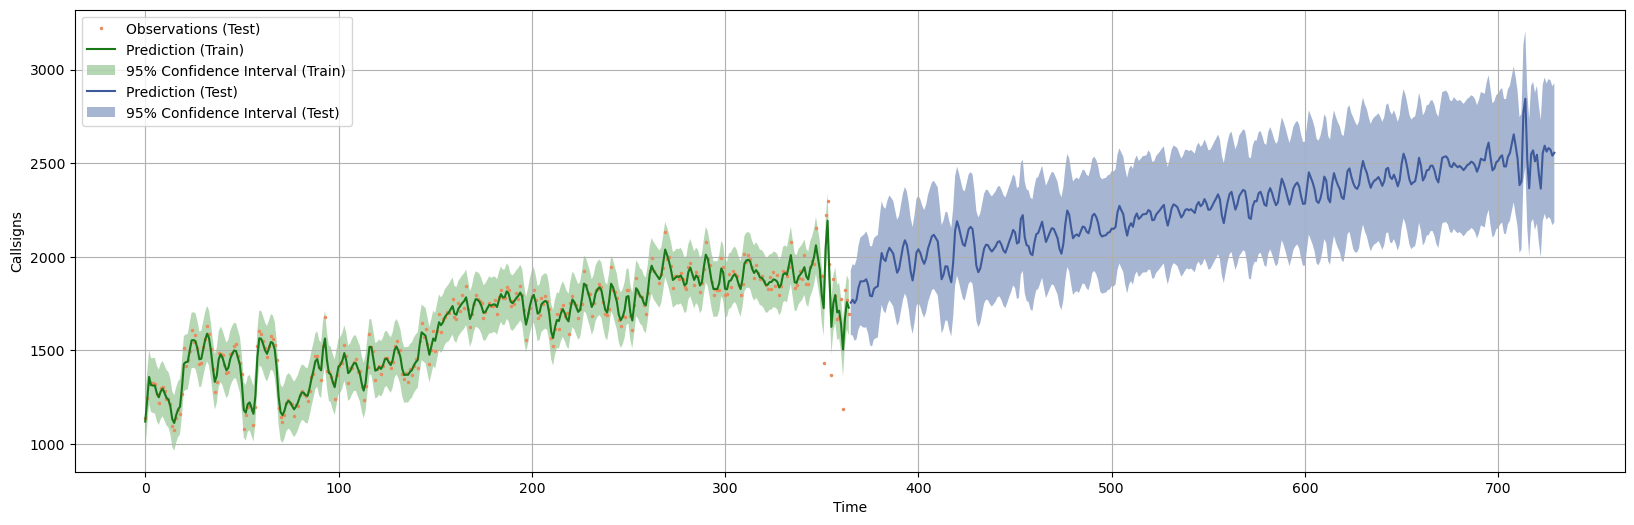

Log Marginal Likelihood (optimized): -2171.6893232737707
Optimized Kernel: 
 10.1**2 * Matern(length_scale=20, nu=1.5) + DotProduct(sigma_0=1.29e+03) + 103**2 * RationalQuadratic(alpha=1.65, length_scale=7.1) + 17.6**2 * RBF(length_scale=20) + WhiteKernel(noise_level=3.81e+03) + 80.8**2 * ExpSineSquared(length_scale=0.0177, periodicity=361)


In [63]:
X_train = wide_2_anom.index.values.reshape(-1, 1)
y_train = wide_2_anom['callsign'].values
X_test = np.arange(365, 365*2).reshape(-1, 1)


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 20.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 20.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 20.0)) +
    WhiteKernel(noise_level=2.63e+05) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    # 1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

## mid

### after

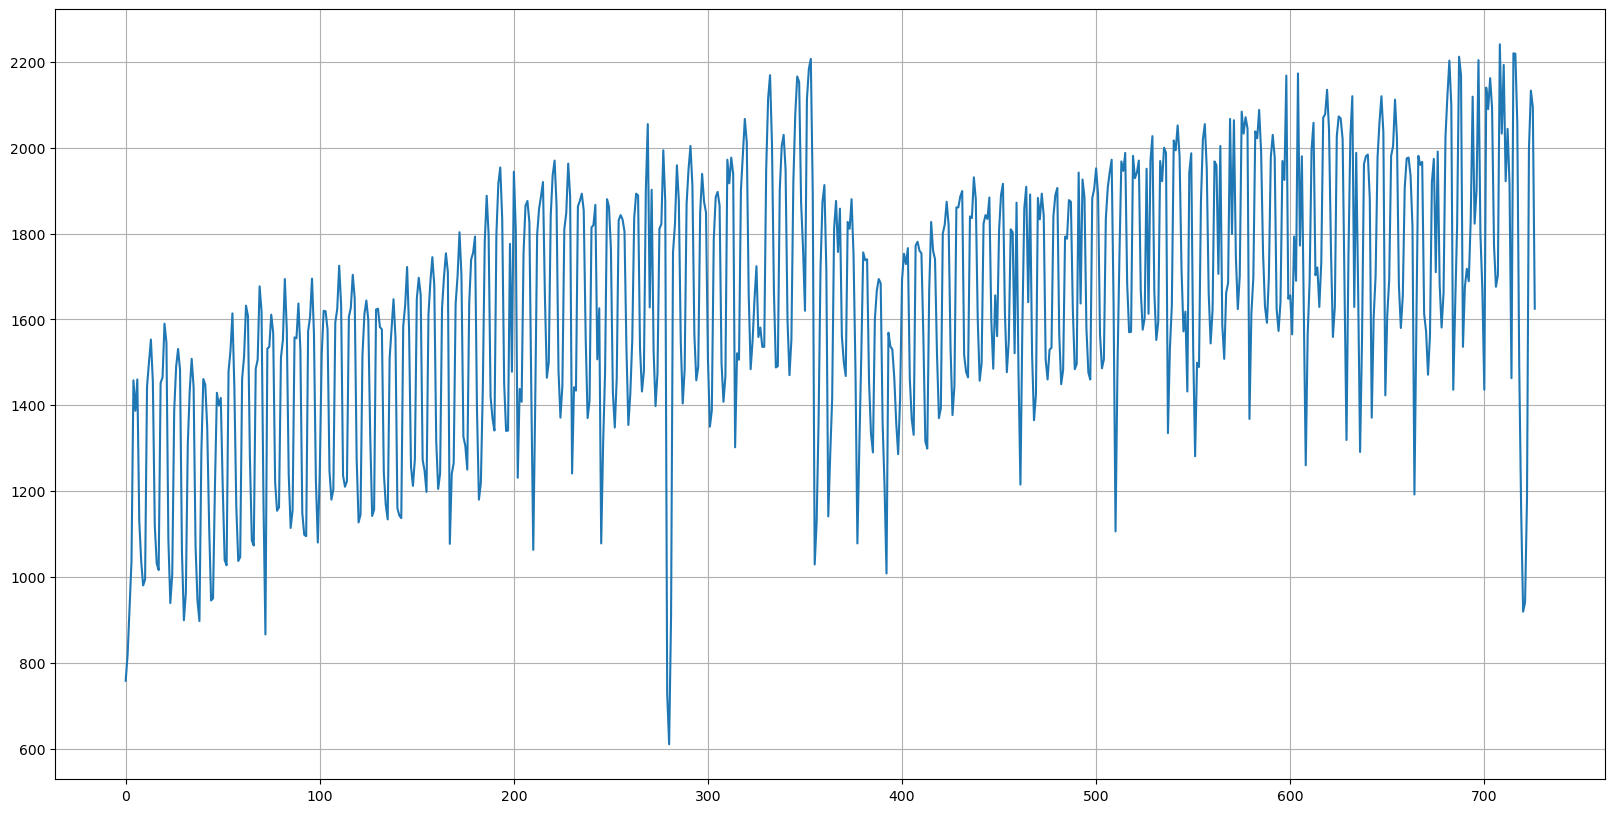

In [64]:
mid['day'] = pd.to_datetime(mid['day'])

st = '2021-01-01'

mid_1 = mid.loc[(mid['day'] >= st), ['day', 'callsign']]
mid_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(mid_1['callsign'])
plt.show()

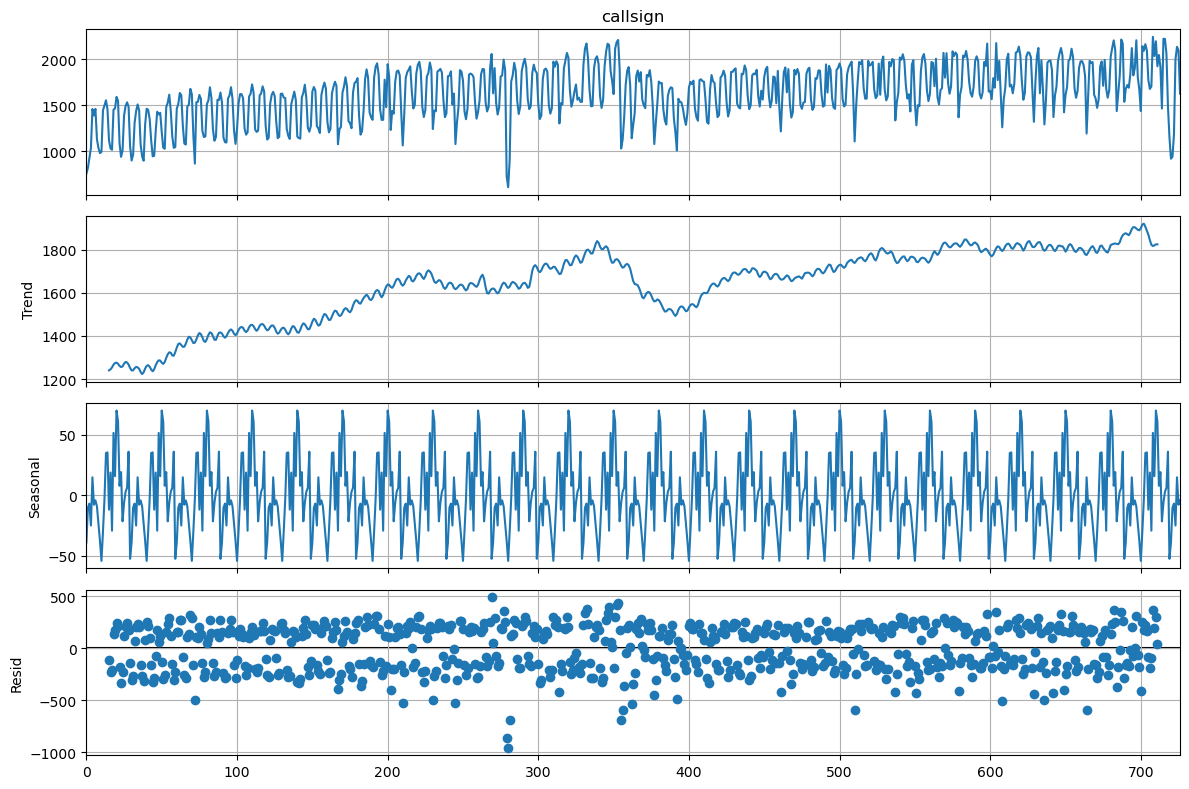

In [65]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(mid_1['callsign'],model='additive',period=30)
res.plot()
plt.show()

279   -864.085840
280   -957.643087
281   -690.239464
355   -690.111927
Name: resid, dtype: float64

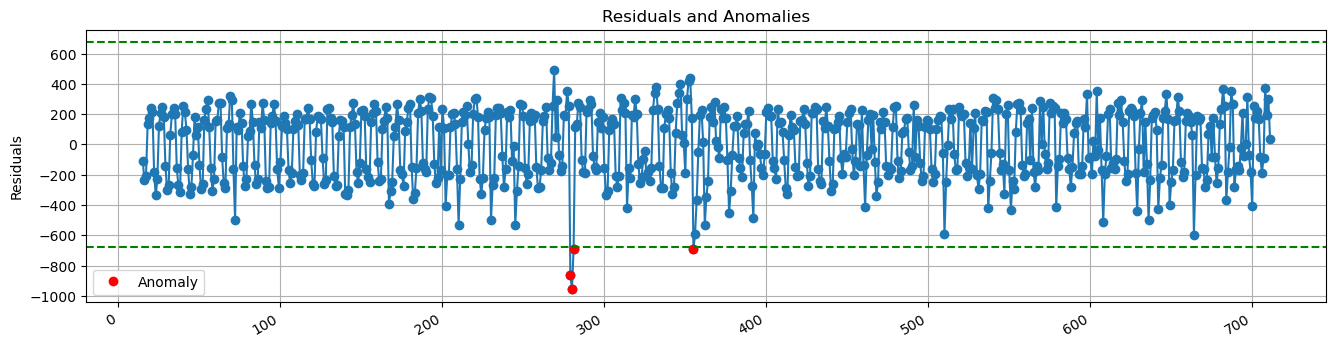

In [66]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [67]:
mid_1_anom = mid_1[~mid_1.index.isin(anom.index)]

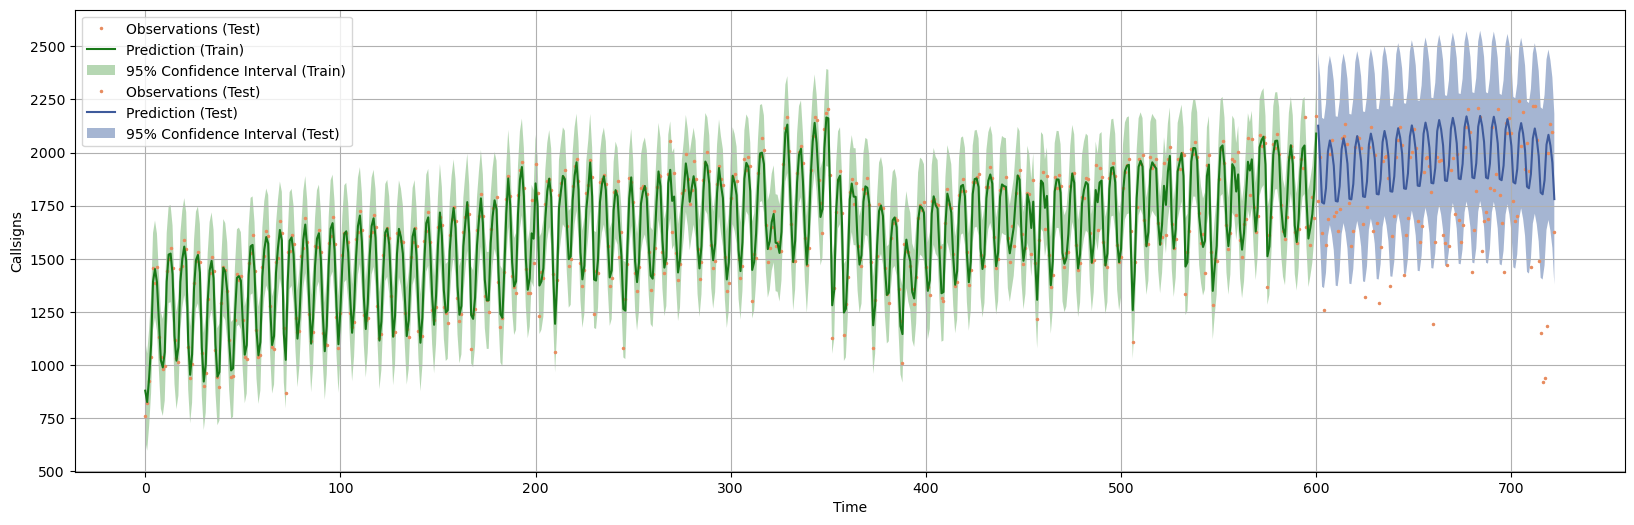

Log Marginal Likelihood (optimized): -3972.1414220985384
Optimized Kernel: 
 0.58**2 * Matern(length_scale=1, nu=1.5) + DotProduct(sigma_0=1.39e+03) + 176**2 * RBF(length_scale=1) + WhiteKernel(noise_level=8.34e+03) + 123**2 * ExpSineSquared(length_scale=0.117, periodicity=7) + 0.878**2 * ExpSineSquared(length_scale=6.27, periodicity=30) + 95.4**2 * ExpSineSquared(length_scale=0.692, periodicity=365)


In [68]:
e_train = '2022-08-31'
s_test = '2022-09-01'

train_all = mid_1_anom.loc[(mid_1_anom['day'] <= e_train), ['day', 'callsign']]
test_all = mid_1_anom.loc[(mid_1_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)

X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1.0))+
    DotProduct()+
    # 1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    1 * ExpSineSquared(length_scale=1, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-1, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

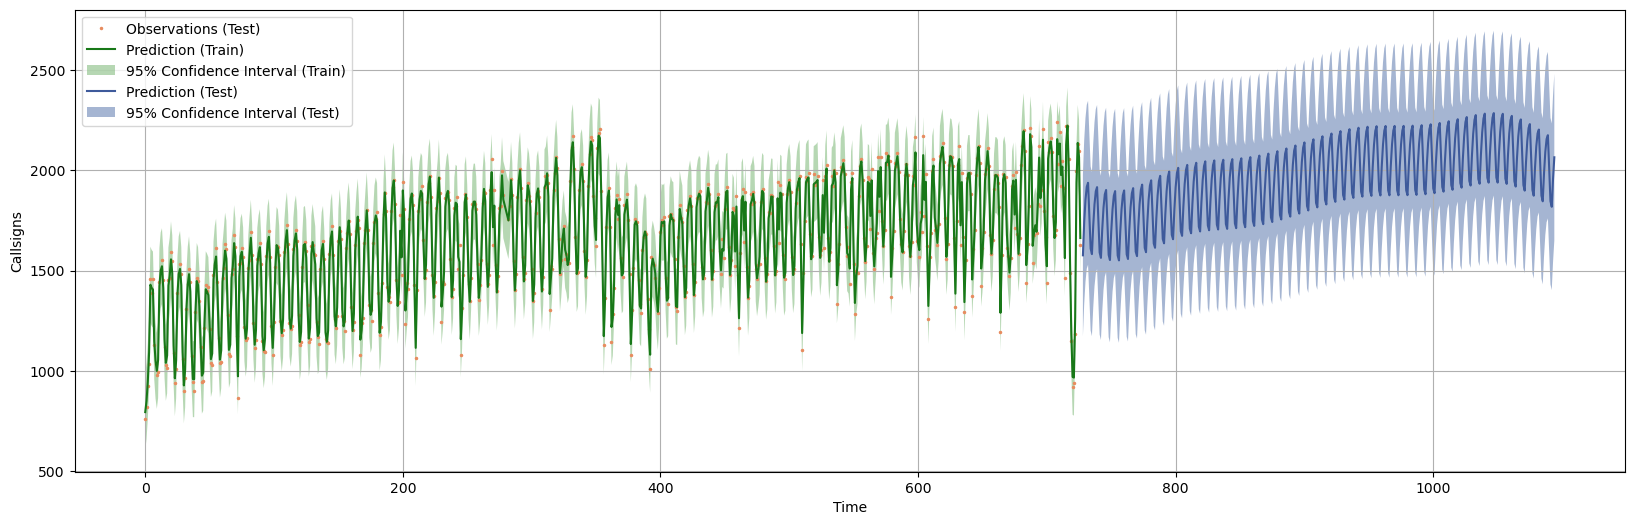

Log Marginal Likelihood (optimized): -4798.536994459281
Optimized Kernel: 
 130**2 * Matern(length_scale=1, nu=1.5) + DotProduct(sigma_0=1.29e+03) + 140**2 * RBF(length_scale=1) + WhiteKernel(noise_level=5.26e+03) + 160**2 * ExpSineSquared(length_scale=1.49, periodicity=7) + 143**2 * ExpSineSquared(length_scale=360, periodicity=30.2) + 125**2 * ExpSineSquared(length_scale=0.824, periodicity=363)


In [69]:
X_train = mid_1_anom.index.values.reshape(-1, 1)
y_train = mid_1_anom['callsign'].values
X_test = np.arange(364*2, 365*3).reshape(-1, 1)

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 1.0))+
    DotProduct()+
    # 1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 1000.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 1.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    1 * ExpSineSquared(length_scale=1, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-1, 1000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(1e-1, 1000.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

### before

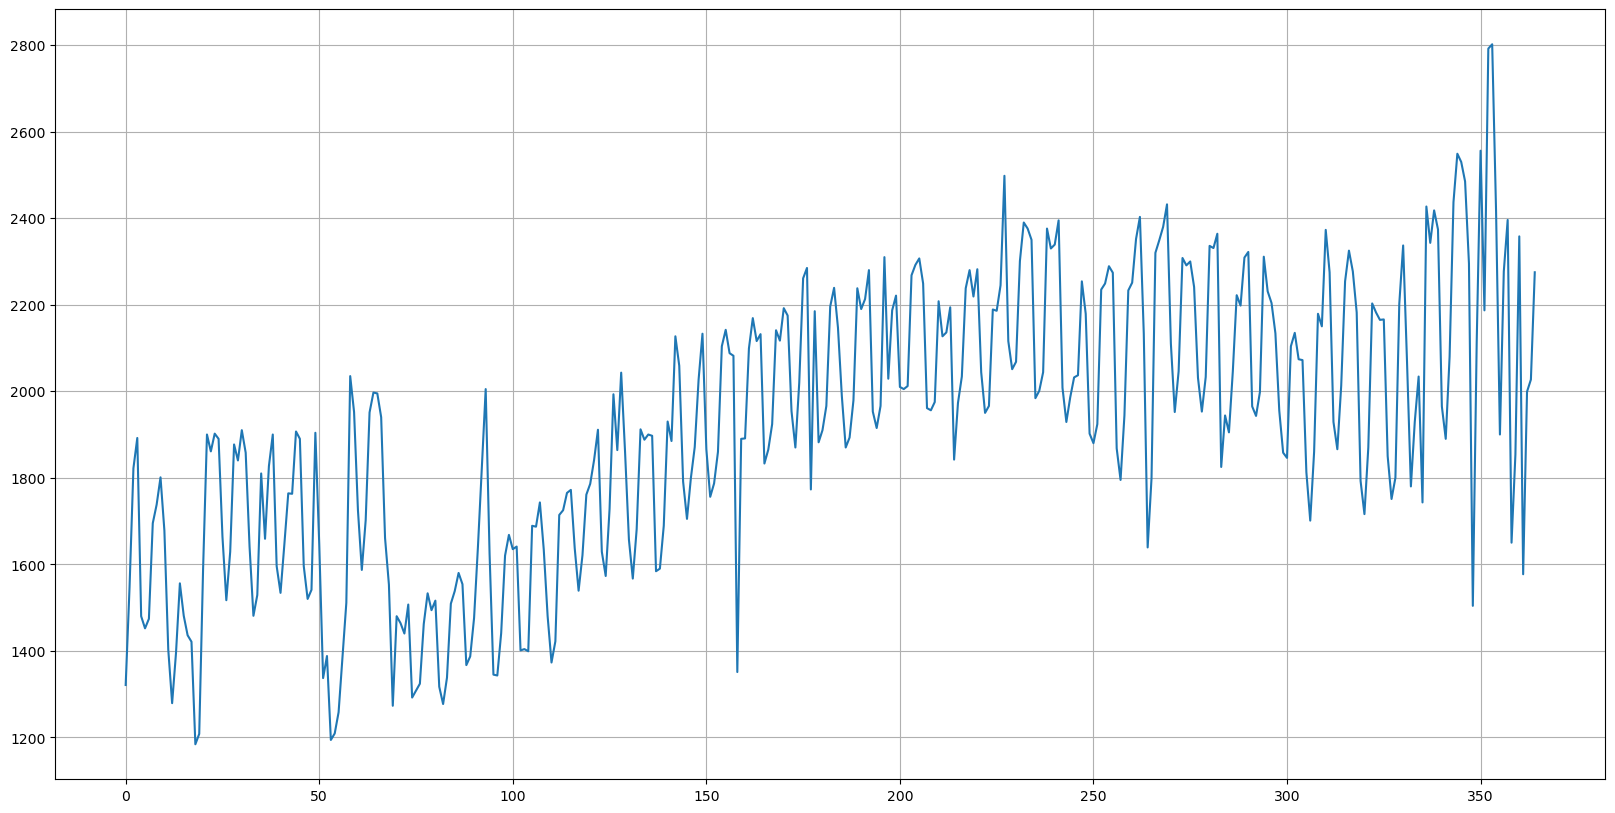

In [93]:
mid['day'] = pd.to_datetime(mid['day'])
st = '2019-01-01'
ed = '2019-12-31'
mid_2 = mid.loc[(mid['day'] >= st) & (mid['day'] <= ed), ['day', 'callsign']]
mid_2.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(mid_2['callsign'])
plt.show()

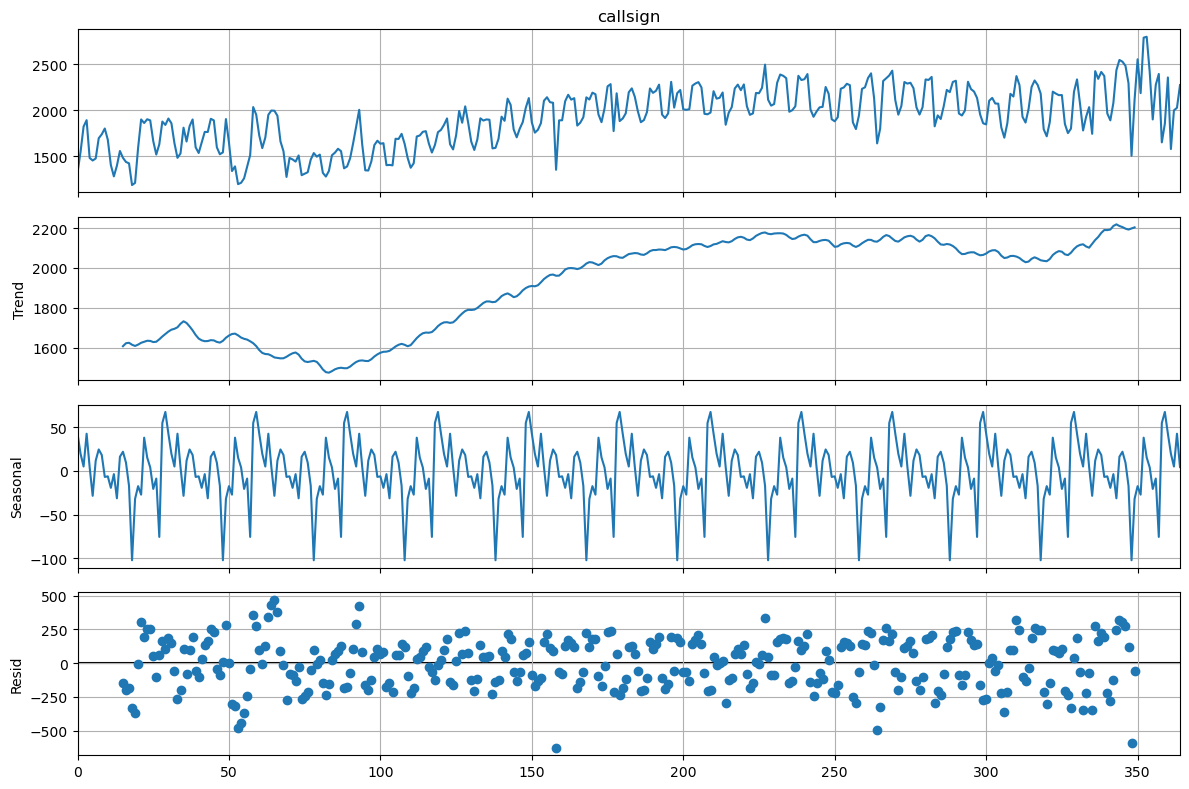

In [94]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(mid_2['callsign'],model='additive',period=30)
res.plot()
plt.show()

158   -628.044099
348   -591.563418
Name: resid, dtype: float64

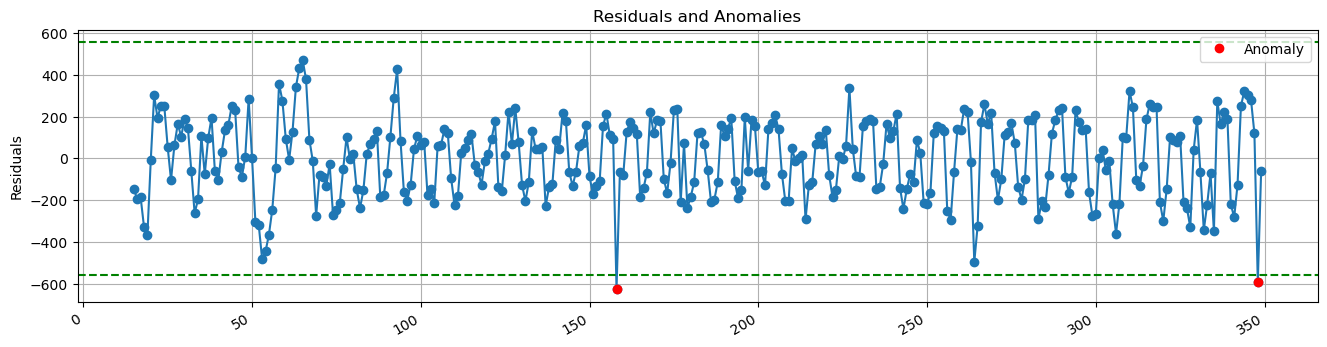

In [95]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [96]:
mid_2_anom = mid_2[~mid_2.index.isin(anom.index)]

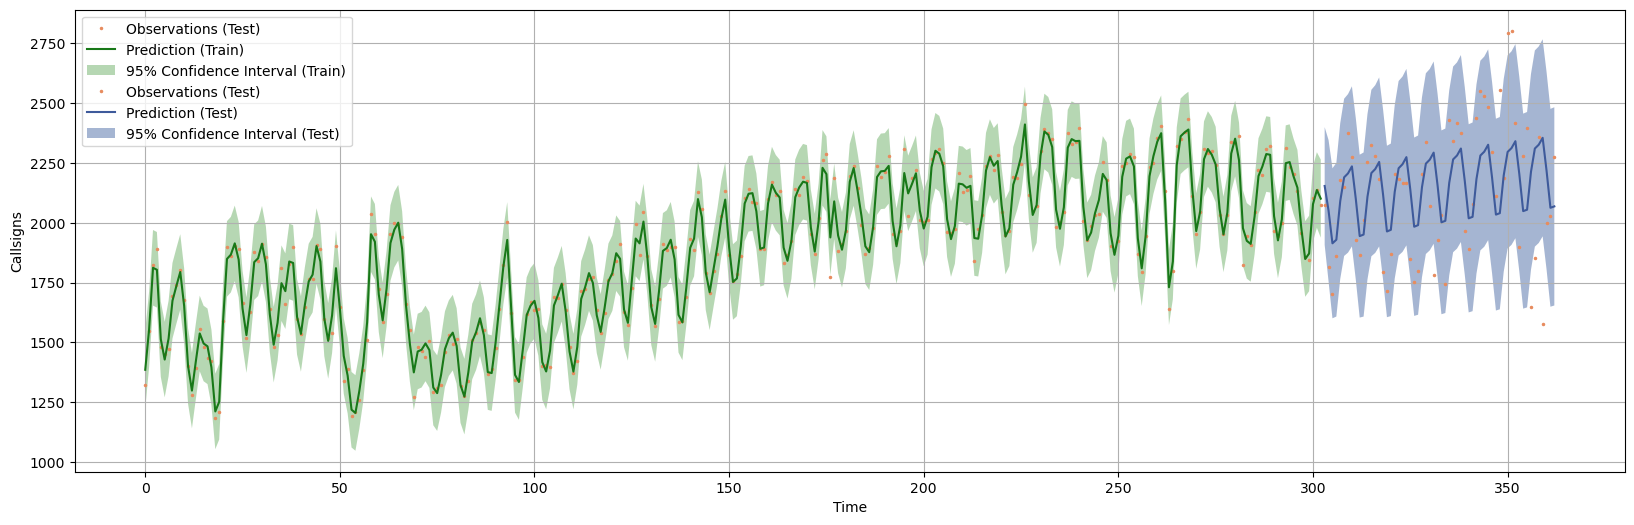

Log Marginal Likelihood (optimized): -1904.5408237513245
Optimized Kernel: 
 131**2 * Matern(length_scale=1.57, nu=1.5) + DotProduct(sigma_0=1.62e+03) + 120**2 * RationalQuadratic(alpha=0.603, length_scale=20) + 0.00316**2 * RBF(length_scale=20) + WhiteKernel(noise_level=3.96e+03) + 198**2 * ExpSineSquared(length_scale=1.61, periodicity=7) + 9.64**2 * ExpSineSquared(length_scale=4.19e-09, periodicity=365)


In [97]:
e_train = '2019-10-31'
s_test = '2019-11-01'

train_all = mid_2_anom.loc[(mid_2_anom['day'] <= e_train), ['day', 'callsign']]
test_all = mid_2_anom.loc[(mid_2_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)



X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 20.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 20.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 20.0)) +
    WhiteKernel(noise_level=2.63e+05) +
    1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(0,10)) +
    # 1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

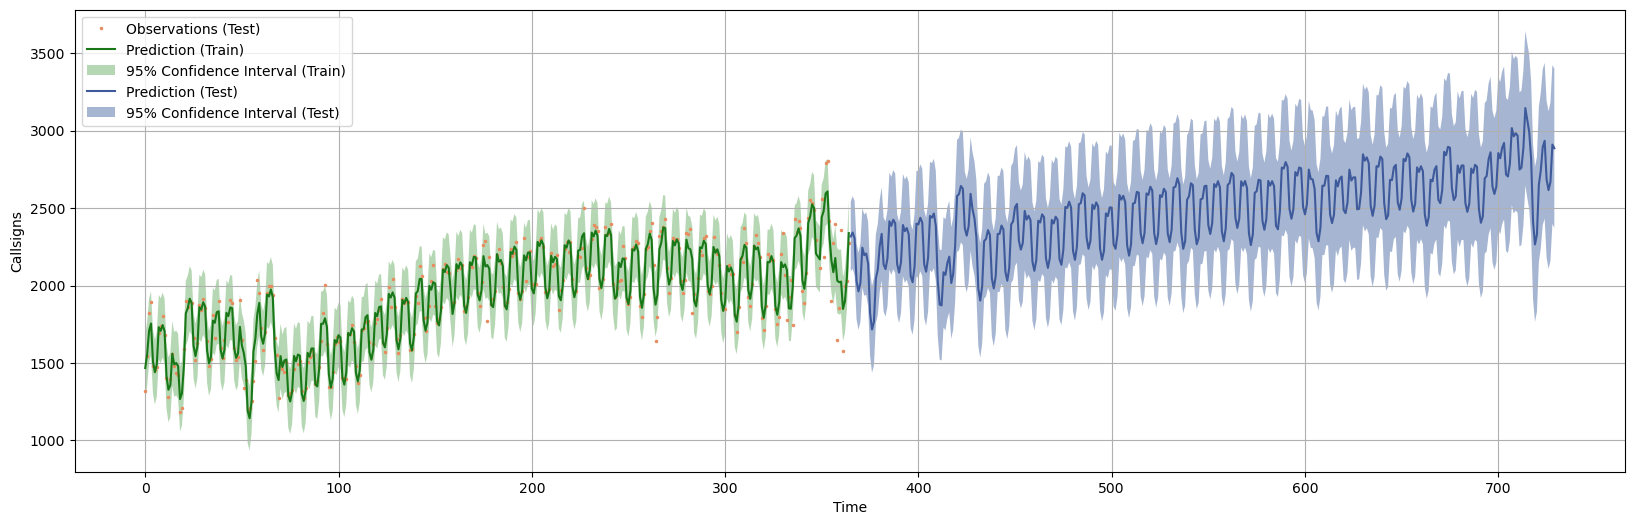

Log Marginal Likelihood (optimized): -2285.920166757763
Optimized Kernel: 
 5.29**2 * Matern(length_scale=20, nu=1.5) + DotProduct(sigma_0=1.52e+03) + 113**2 * RationalQuadratic(alpha=1.19, length_scale=20) + 7.61**2 * RBF(length_scale=20) + WhiteKernel(noise_level=9.09e+03) + 151**2 * ExpSineSquared(length_scale=0.108, periodicity=7) + 110**2 * ExpSineSquared(length_scale=0.0439, periodicity=360)


In [75]:
X_train = mid_2_anom.index.values.reshape(-1, 1)
y_train = mid_2_anom['callsign'].values
X_test = np.arange(365, 365*2).reshape(-1, 1)


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 20.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 20.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 20.0)) +
    WhiteKernel(noise_level=2.63e+05) +
    1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(0,10)) +
    # 1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(1e-2, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

## narrow

## after

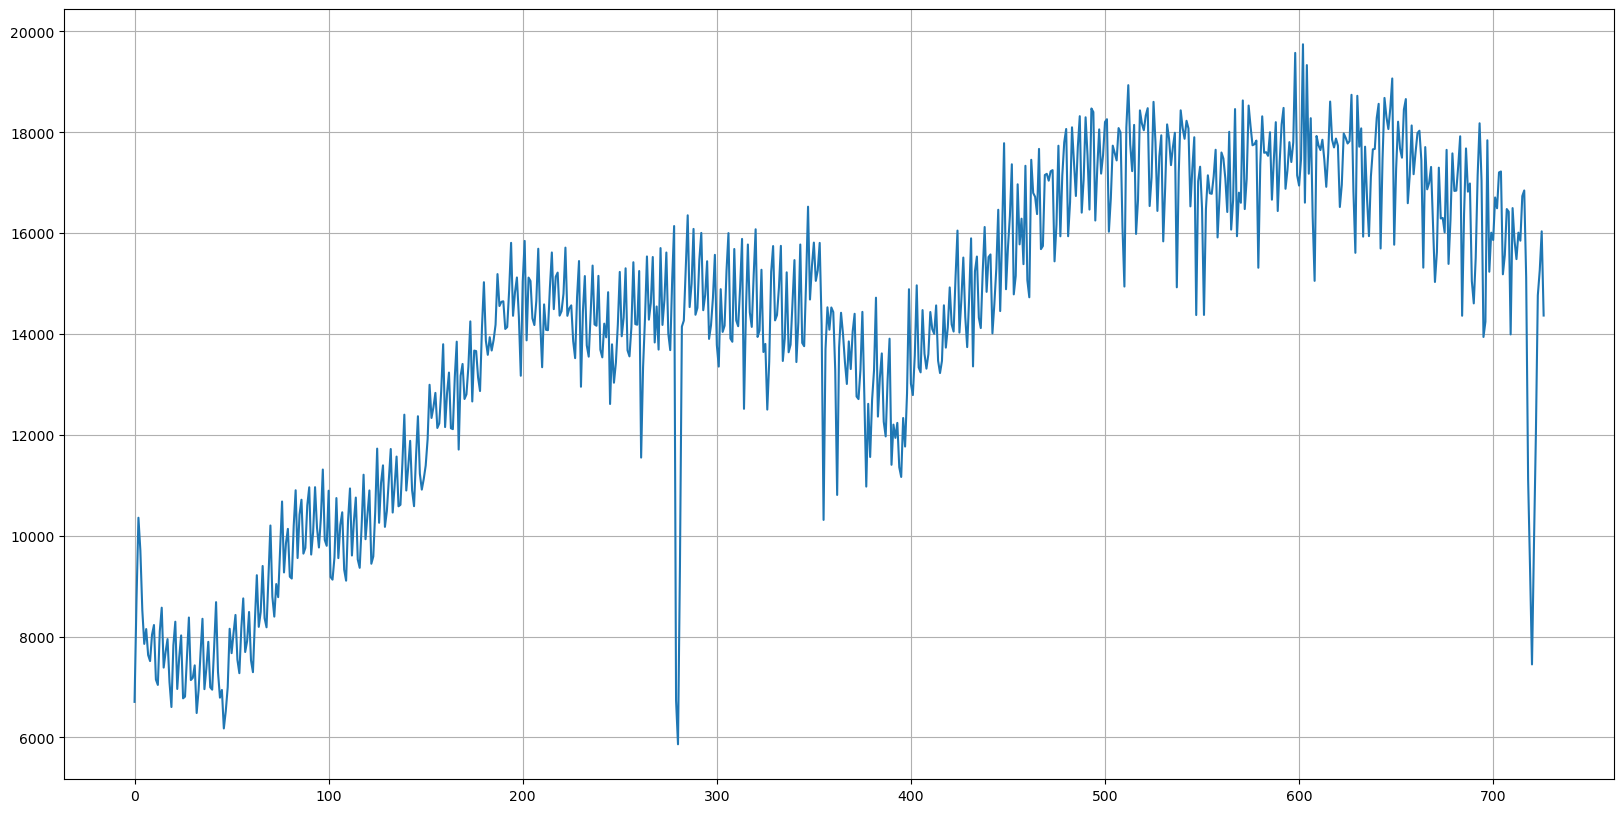

In [76]:
narrow['day'] = pd.to_datetime(narrow['day'])

st = '2021-01-01'

narrow_1 = narrow.loc[(narrow['day'] >= st), ['day', 'callsign']]
narrow_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(narrow_1['callsign'])
plt.show()

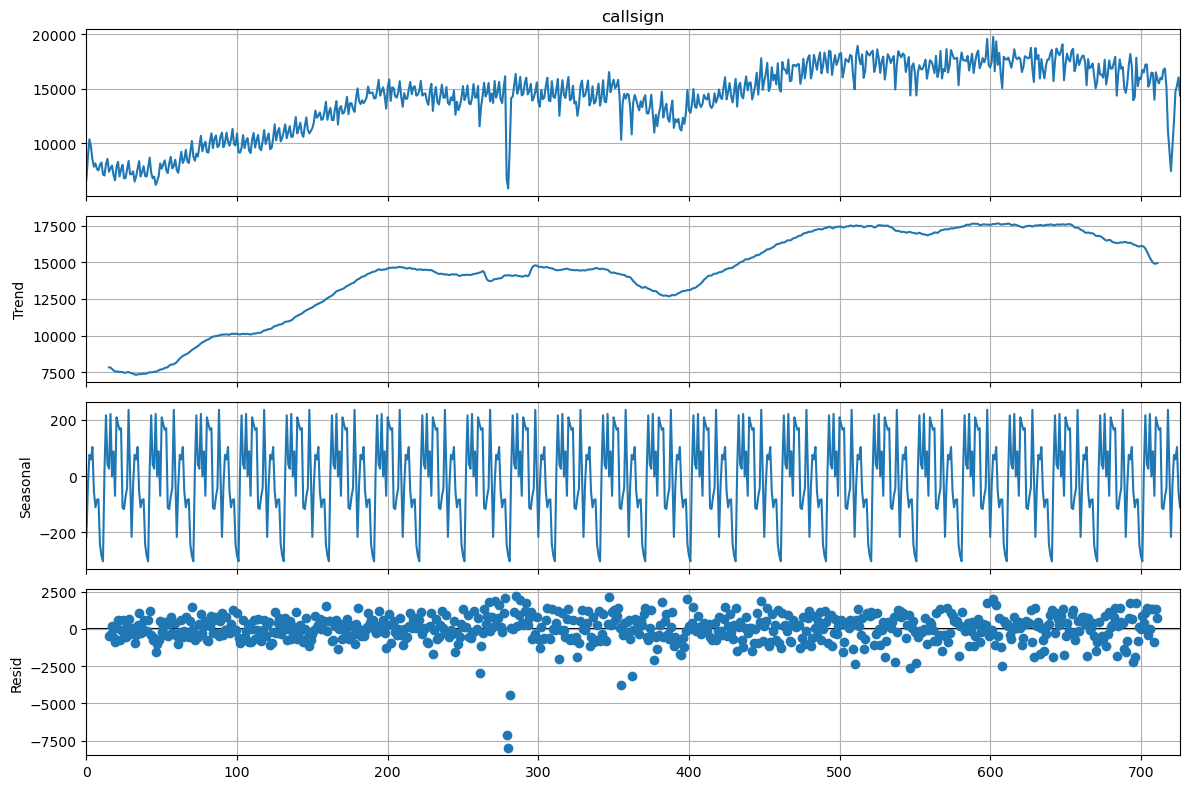

In [77]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(narrow_1['callsign'],model='additive',period=30)
res.plot()
plt.show()

261   -2938.196517
279   -7133.167712
280   -7968.756118
281   -4442.462640
355   -3735.046698
362   -3126.542350
Name: resid, dtype: float64

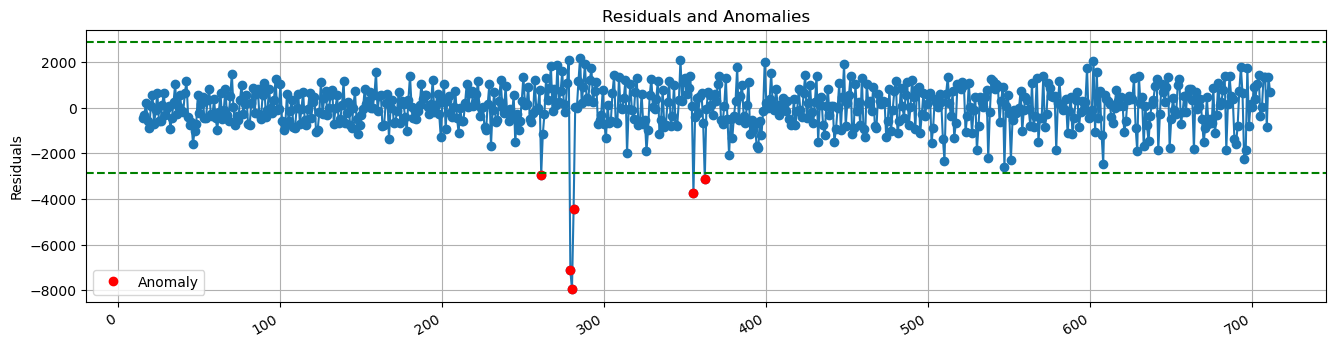

In [78]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [79]:
narrow_1_anom = narrow_1[~narrow_1.index.isin(anom.index)]

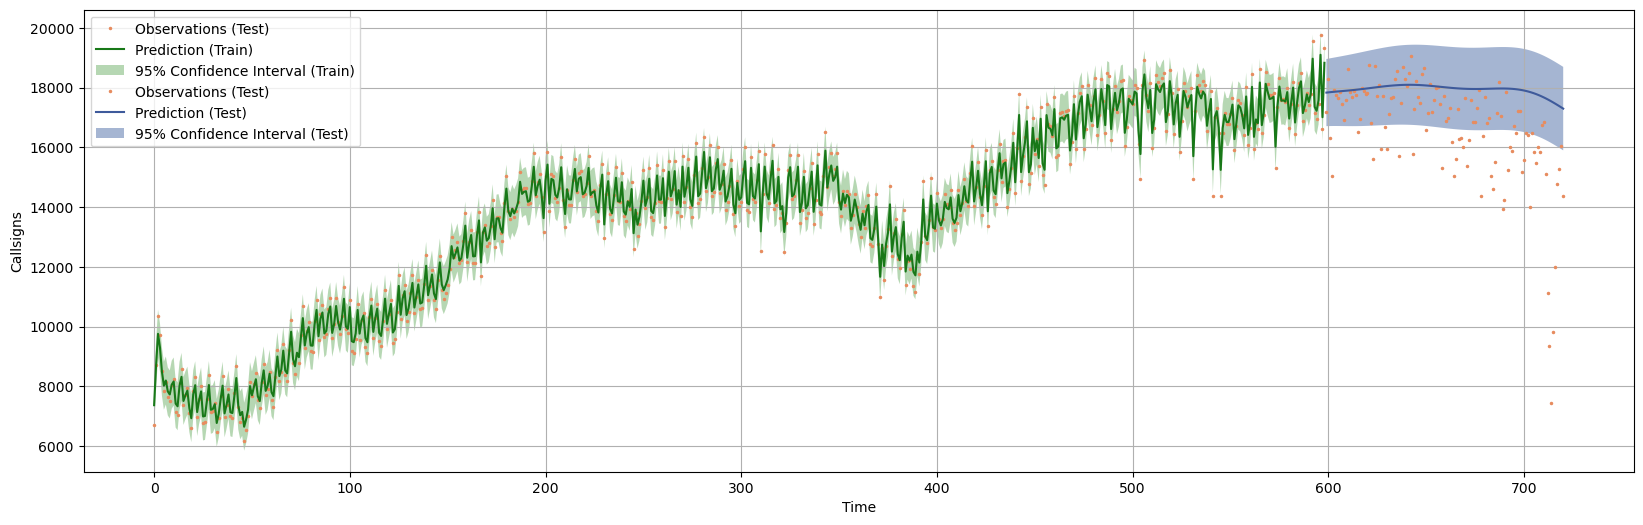

Log Marginal Likelihood (optimized): -5108.253460352412
Optimized Kernel: 
 316**2 * Matern(length_scale=35.2, nu=1.5) + DotProduct(sigma_0=1.06e+04) + 316**2 * RationalQuadratic(alpha=1e+05, length_scale=3.89e-26) + 316**2 * RBF(length_scale=0.246) + WhiteKernel(noise_level=1e+05) + 0.00321**2 * ExpSineSquared(length_scale=1.31e-25, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.481, periodicity=360)


In [80]:
e_train = '2022-08-31'
s_test = '2022-09-01'

train_all = narrow_1_anom.loc[(narrow_1_anom['day'] <= e_train), ['day', 'callsign']]
test_all = narrow_1_anom.loc[(narrow_1_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)

X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 50.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 50.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 50.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(0, 5.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 5.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

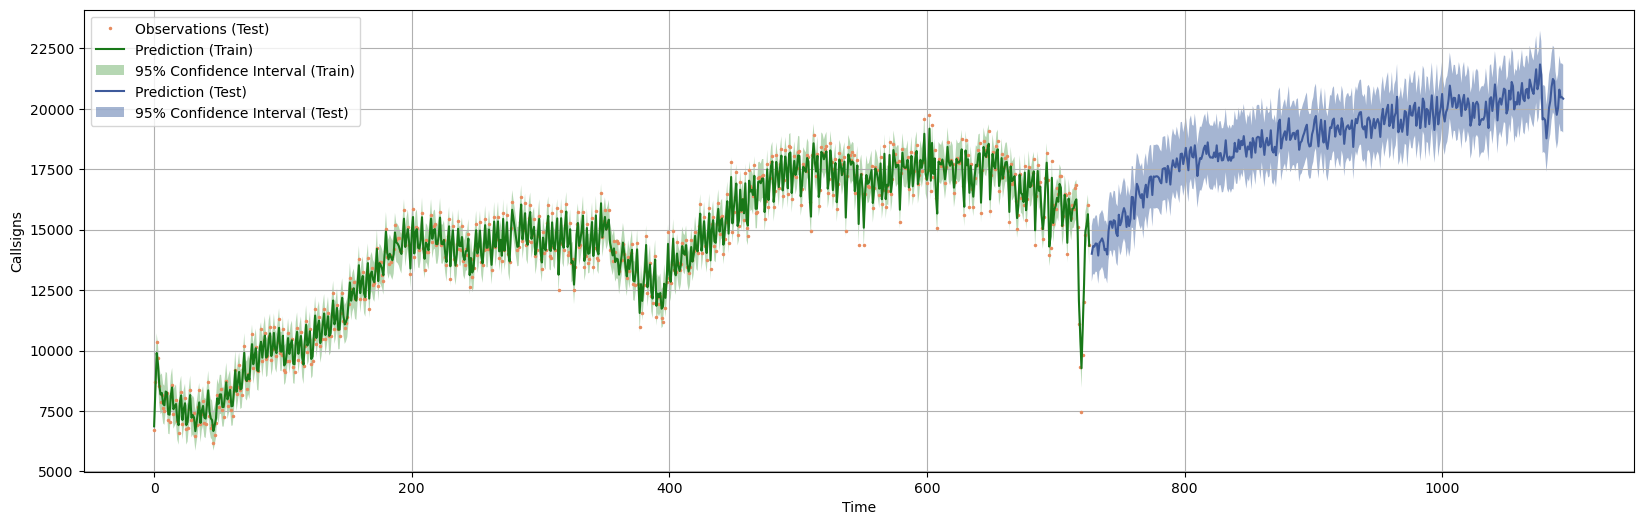

Log Marginal Likelihood (optimized): -6333.147327860618
Optimized Kernel: 
 316**2 * Matern(length_scale=0.00446, nu=1.5) + DotProduct(sigma_0=3.36e+03) + 316**2 * RationalQuadratic(alpha=1.32e-05, length_scale=47.9) + 316**2 * RBF(length_scale=29.9) + WhiteKernel(noise_level=1e+05) + 316**2 * ExpSineSquared(length_scale=0.0119, periodicity=30.3) + 316**2 * ExpSineSquared(length_scale=0.0133, periodicity=361)


In [81]:
X_train = narrow_1_anom.index.values.reshape(-1, 1)
y_train = narrow_1_anom['callsign'].values
X_test = np.arange(364*2, 365*3).reshape(-1, 1)

k = (
    1 * Matern(length_scale=50, nu=1.5, length_scale_bounds=(0, 50.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=50, length_scale_bounds=(0, 50.0)) +
    1 * RBF(length_scale=50, length_scale_bounds=(0, 50.0)) +
    WhiteKernel(noise_level=2.63e+06) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(100, 100000.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(0, 5.0)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 5.0))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

## before

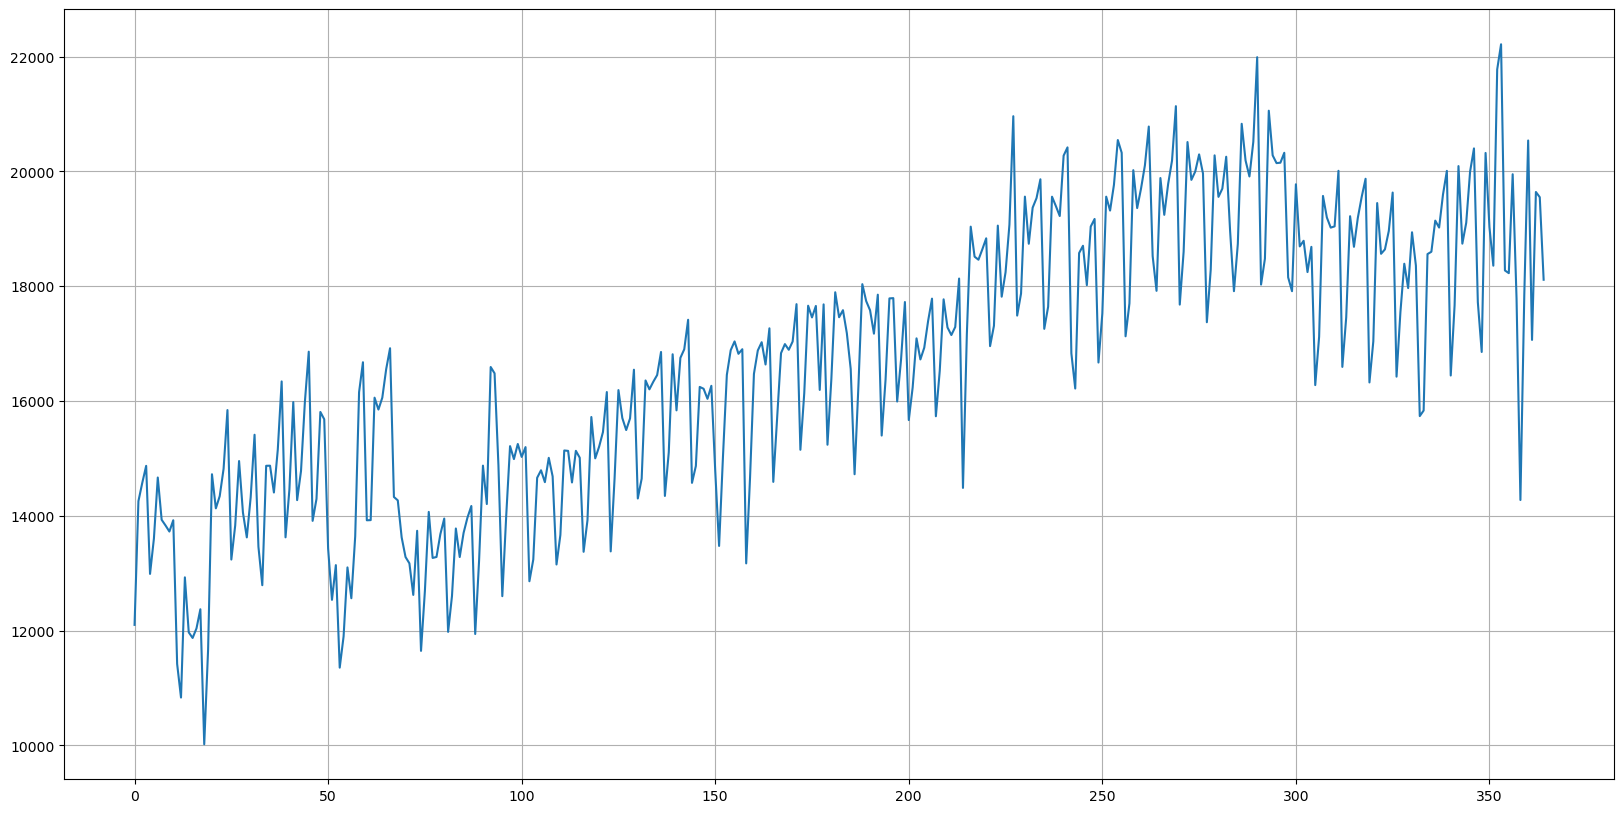

In [88]:
narrow['day'] = pd.to_datetime(narrow['day'])
st = '2019-01-01'
ed = '2019-12-31'
narrow_2 = narrow.loc[(narrow['day'] >= st) & (narrow['day'] <= ed), ['day', 'callsign']]
narrow_2.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(narrow_2['callsign'])
plt.show()


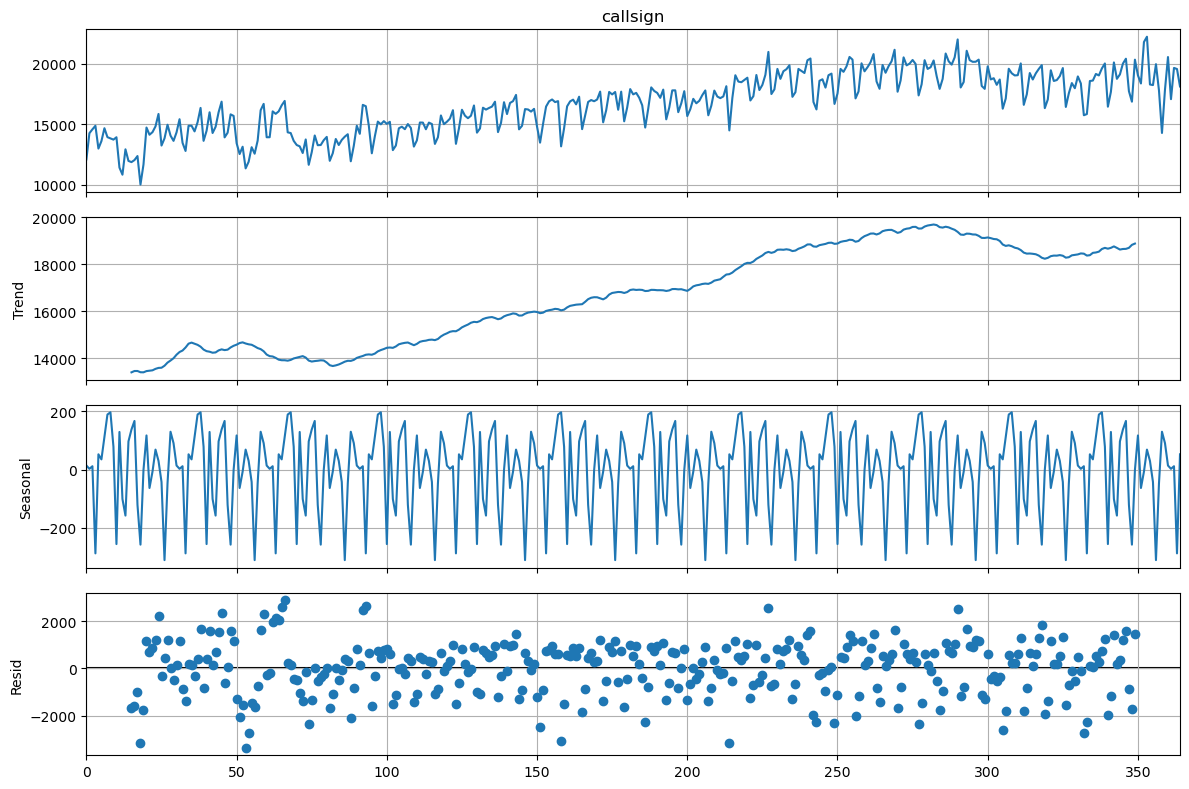

In [89]:
# This part is from ADS lab Session2_TimeSeries_model
# Trend, seasonality, noise decomposition
plt.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(narrow_2['callsign'],model='additive',period=30)
res.plot()
plt.show()

Series([], Name: resid, dtype: float64)

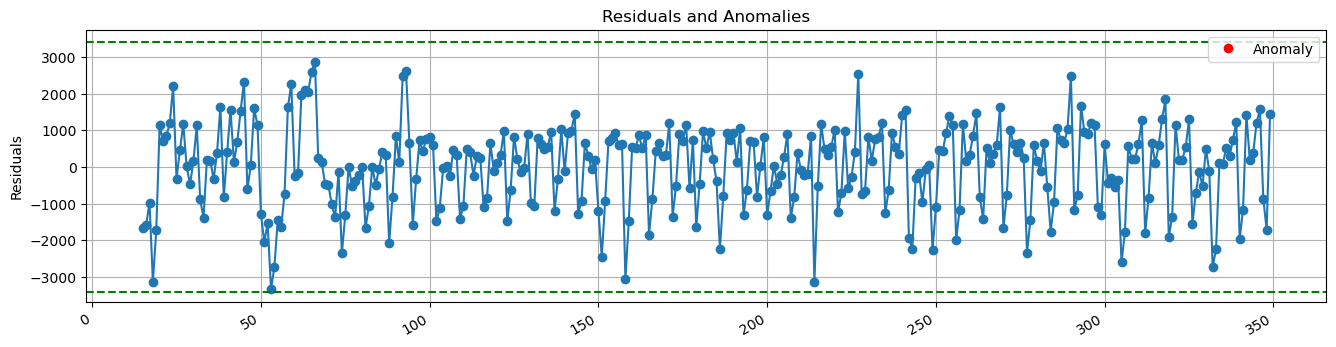

In [90]:
# Anomaly Detection
# analyze the deviation of residue and introduce some threshold for it
residuals = res.resid.dropna()
t1 = residuals.mean()+3*residuals.std()
t2 = residuals.mean()-3*residuals.std()

plt.rcParams['figure.figsize']=[16, 4]
plt.rcParams['axes.grid']=True

plt.plot(residuals.index, residuals, linestyle='-', marker='o')

anom = residuals[(residuals > t1) | (residuals < t2)]
plt.plot(anom.index, anom, linestyle='none', marker='o', color='r', label='Anomaly')

plt.axhline(y=t1, color='g', linestyle='--')
plt.axhline(y=t2, color='g', linestyle='--')

# 改善布局以防止重叠
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Residuals and Anomalies')
plt.ylabel('Residuals')

anom

In [91]:
narrow_2_anom = narrow_2[~narrow_2.index.isin(anom.index)]

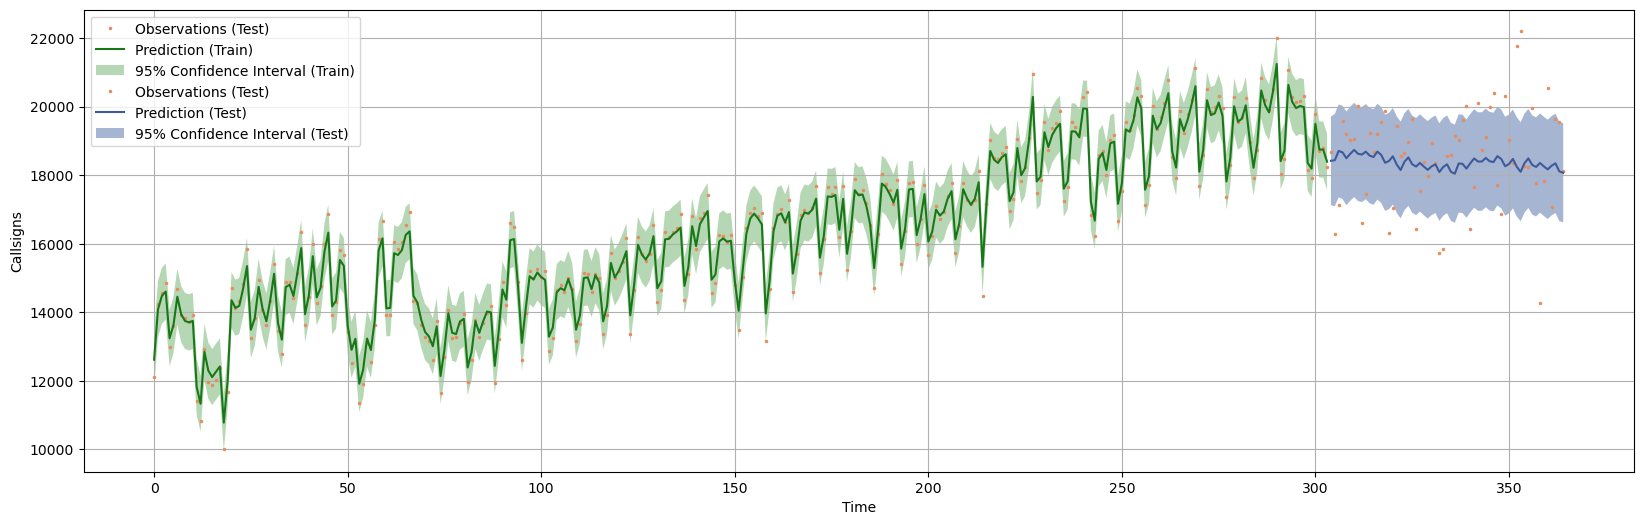

Log Marginal Likelihood (optimized): -2804.968337550533
Optimized Kernel: 
 316**2 * Matern(length_scale=1.22e-06, nu=1.5) + DotProduct(sigma_0=1.5e+04) + 316**2 * RationalQuadratic(alpha=0.441, length_scale=10) + 316**2 * RBF(length_scale=0.753) + WhiteKernel(noise_level=1e+05) + 203**2 * ExpSineSquared(length_scale=0.166, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.013, periodicity=365)


In [92]:
e_train = '2019-10-31'
s_test = '2019-11-01'

train_all = narrow_2_anom.loc[(narrow_2_anom['day'] <= e_train), ['day', 'callsign']]
test_all = narrow_2_anom.loc[(narrow_2_anom['day'] >= s_test), ['day', 'callsign']]
train_all.reset_index(drop=True, inplace=True)
test_all.reset_index(drop=True, inplace=True)



X_train = train_all.index.values.reshape(-1, 1)
y_train = train_all['callsign'].values
X_test = np.arange(len(train_all), len(train_all) + len(test_all)).reshape(-1, 1)
y_test = test_all['callsign'].values


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 10.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 10.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 10.0)) +
    WhiteKernel(noise_level=2.63e+04) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(0,10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(0, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)

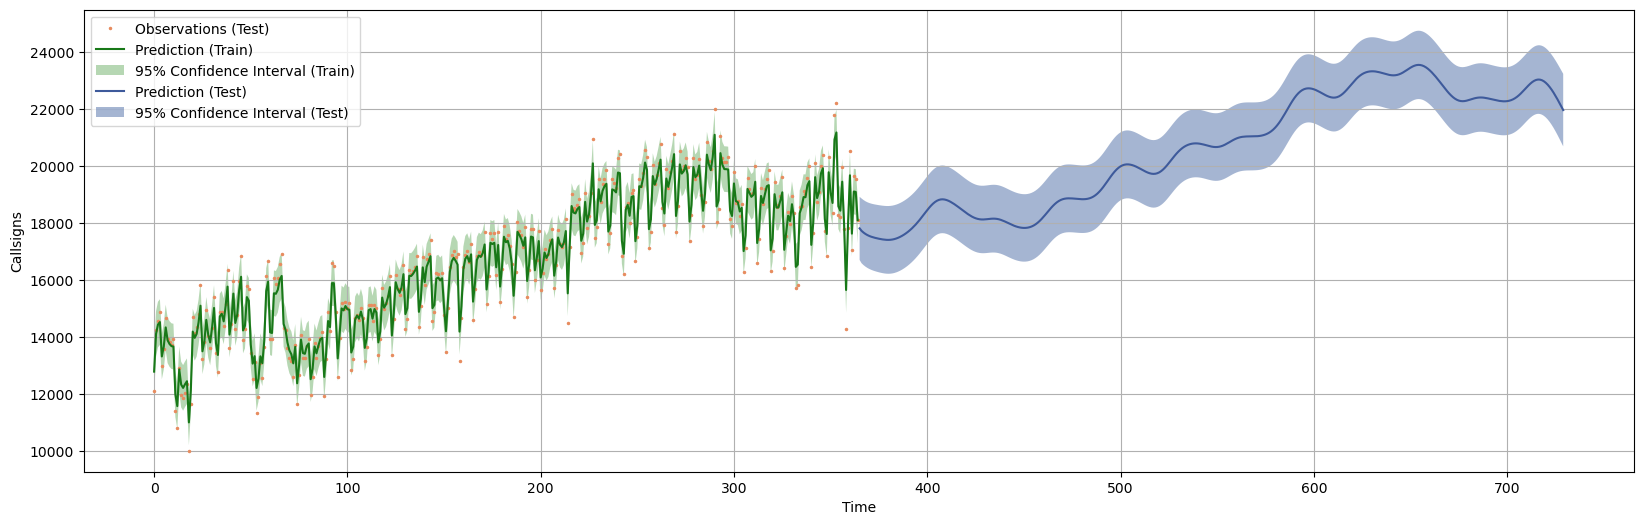

Log Marginal Likelihood (optimized): -3584.470973498887
Optimized Kernel: 
 316**2 * Matern(length_scale=2.7e-05, nu=1.5) + DotProduct(sigma_0=1.46e+04) + 316**2 * RationalQuadratic(alpha=1.34e-05, length_scale=9.88) + 316**2 * RBF(length_scale=0.767) + WhiteKernel(noise_level=1e+05) + 316**2 * ExpSineSquared(length_scale=2.2, periodicity=31) + 316**2 * ExpSineSquared(length_scale=0.248, periodicity=365)


In [87]:
X_train = narrow_2_anom.index.values.reshape(-1, 1)
y_train = narrow_2_anom['callsign'].values
X_test = np.arange(365, 365*2).reshape(-1, 1)


k = (
    1 * Matern(length_scale=20, nu=1.5, length_scale_bounds=(0, 10.0))+
    DotProduct()+
    1 * RationalQuadratic(length_scale=20, length_scale_bounds=(0, 10.0)) +
    1 * RBF(length_scale=20, length_scale_bounds=(0, 10.0)) +
    WhiteKernel(noise_level=2.63e+04) +
    # 1 * ExpSineSquared(length_scale=10, periodicity=7, periodicity_bounds=(7, 7), length_scale_bounds=(0,10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=30, periodicity_bounds=(30, 31), length_scale_bounds=(0, 10)) +
    1 * ExpSineSquared(length_scale=1, periodicity=365, periodicity_bounds=(360, 365), length_scale_bounds=(0, 10))
)

gp = GaussianProcessRegressor(kernel=k, random_state=999)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)
y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Modified plot code
fig = plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(X_train, y_train, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))
# Plot prediction and confidence interval for training data
plt.plot(X_train, y_train_pred, '-', label=u'Prediction (Train)', color=(24/255, 120/255, 24/255))
plt.fill_between(X_train.ravel(), 
                 y_train_pred - 1.9600 * sigma_train,
                 y_train_pred + 1.9600 * sigma_train,
                 alpha=0.5, fc=(111/255, 177/255, 105/255), ec='None', label='95% Confidence Interval (Train)')


# Plot testing data
# plt.plot(X_test, y_test, '.', markersize=3, label=u'Observations (Test)', color=(231/255, 140/255, 95/255))

# Plot prediction and confidence interval for testing data
plt.plot(X_test, y_pred, '-', label=u'Prediction (Test)', color=(62/255, 90/255, 155/255))
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.9600 * sigma,
                 y_pred + 1.9600 * sigma,
                 alpha=0.5, fc=(77/255, 109/255, 166/255), ec='None', label='95% Confidence Interval (Test)')

plt.xlabel('Time')
plt.ylabel('Callsigns')
plt.legend(loc='upper left')
plt.show()

# Output the log marginal likelihood and the optimized kernel parameters
print("Log Marginal Likelihood (optimized):", gp.log_marginal_likelihood_value_)
print("Optimized Kernel: \n", gp.kernel_)